# Notebook d'essais

### Sommaire  
Introduction
1- Nettoyage des données et Analyse exploratoire.  
2- Modélisation et segmentation des clients.  
3- Analyse de la stabilité  
Conclusion

## Introduction

La  solution de vente en ligne « Olist »  souhaite segmenter sa base de clients selon l’intention d’achat afin de les cibler efficacement. Pour ce faire, il a fallu partitionner les données en clusters, de manière non supervisée,  grâce aux comportements et aux données personnelles comme expliqué à travers ce notebook. 

## A - Nettoyage des données et Analyse exploratoire

### I- Nettoyage

#### Importation des librairies

In [1]:
# Disable warnings in Anaconda

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from numpy import isnan

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina' 

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt


#import pylab
#%pylab


%matplotlib inline

#plt.style.use('seaborn-whitegrid')

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap'] = 'viridis'

# We will use the Seaborn library
import seaborn as sns
sns.set()


# import sklearn.impute library
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier

# pour la lecture directe du fichier par internet
import io
import requests

#import utils

# coefficient de pearson
import scipy.stats as st
import squarify


#### Chargement des jeux de données et affichage des caractéristiques

In [2]:
# Chargement des jeux de données
customers = pd.read_csv('archive/olist_customers_dataset.csv', sep=',')
geolocation=pd.read_csv('archive/olist_geolocation_dataset.csv', sep=',')
items=pd.read_csv('archive/olist_order_items_dataset.csv', sep=',')
payments=pd.read_csv('archive/olist_order_payments_dataset.csv', sep=',')
reviews=pd.read_csv('archive/olist_order_reviews_dataset.csv', sep=',')
orders=pd.read_csv('archive/olist_orders_dataset.csv', sep=',')
products=pd.read_csv('archive/olist_products_dataset.csv', sep=',')
sellers=pd.read_csv('archive/olist_sellers_dataset.csv', sep=',')
category=pd.read_csv('archive/product_category_name_translation.csv', sep=',')

In [3]:
datasets=[customers, geolocation, items, payments, reviews, orders, products, sellers, category]
names=['customers', 'geolocation', 'items', 'payments', 'reviews', 'orders', 'products', 'sellers', 'category']

In [4]:
#Attribution de noms aux bases de données
customers.name='customers'
category.name='category'
geolocation.name='geolocation'
items.name='items'
payments.name='payments'
reviews.name='reviews'
orders.name='orders'
products.name='products'
sellers.name='sellers'
category.name='category'

In [5]:
#Affichage tableau comparatif des jeux de données
nb_cols=nb_rows=dataset=perc_nans =[]
chunks=[]

for i in range(len(datasets)):
    nb_cols= datasets[i].shape[1]
    nb_rows= datasets[i].shape[0]
    dataset=names[i]
    perc_nans=(datasets[i].isna().mean().sum()*100)/datasets[i].shape[1]
    
    # dictionary of lists  
    dict = {'dataset': dataset, 'features': nb_cols, 'samples': nb_rows, '%missed_data': perc_nans}  
    chunks.append(pd.DataFrame(dict , index=[0]))
    

    
df1 = pd.concat(chunks, ignore_index=True)

In [6]:
df1

,dataset,features,samples,%missed_data
0,customers,5,99441,0.000000
1,geolocation,5,1000163,0.000000
2,items,7,112650,0.000000
3,payments,5,103886,0.000000
4,reviews,7,100000,20.933143
5,orders,8,99441,0.616949
6,products,9,32951,0.825468
7,sellers,4,3095,0.000000
8,category,2,71,0.000000


In [7]:
#Affichage tableau comparatif des jeux de données
cols=types=dataset=nans =[]
chunks=[]

for i in range(len(datasets)):
    cols= datasets[i].dtypes.index
    types= datasets[i].dtypes.values
    dataset=names[i]
    nans=datasets[i].isna().mean()*100

    # dictionary of lists  
    dict = {'dataset': dataset, 'features': cols, 'dtypes': types, '%missed_data':nans}  
    
    chunks.append(pd.DataFrame(dict))
    

    
df = pd.concat(chunks, ignore_index=True)

In [8]:
df

,dataset,features,dtypes,%missed_data
0,customers,customer_id,object,0.000000
1,customers,customer_unique_id,object,0.000000
2,customers,customer_zip_code_prefix,int64,0.000000
3,customers,customer_city,object,0.000000
4,customers,customer_state,object,0.000000
5,geolocation,geolocation_zip_code_prefix,int64,0.000000
6,geolocation,geolocation_lat,float64,0.000000
7,geolocation,geolocation_lng,float64,0.000000
8,geolocation,geolocation_city,object,0.000000
9,geolocation,geolocation_state,object,0.000000


Combinaison de toutes les bases de données dans un seul tableau comportant les datasets utiles pour la suite  orders + items+customers + products category + reviews

In [9]:
# Fusion des jeux de données

olist = orders.merge(items, on='order_id', how='left')
olist = olist.merge(customers, on='customer_id', how='inner')
olist = olist.merge(payments, on='order_id', how='inner')
olist = olist.merge(products, on='product_id', how='inner')
olist = olist.merge(category, on='product_category_name',how='inner')
#
olist = olist.merge(reviews, on='order_id', how='inner')

En ce qui suit, il y a détection des colonnes comportant le  grand nombre de nan et suppression de colonnes non significatives pour la suite de l'étude

In [10]:
olist.isna().mean()*100

order_id                          0.000000
customer_id                       0.000000
order_status                      0.000000
order_purchase_timestamp          0.000000
order_approved_at                 0.012009
order_delivered_carrier_date      1.040478
order_delivered_customer_date     2.157298
order_estimated_delivery_date     0.000000
order_item_id                     0.000000
product_id                        0.000000
seller_id                         0.000000
shipping_limit_date               0.000000
price                             0.000000
freight_value                     0.000000
customer_unique_id                0.000000
customer_zip_code_prefix          0.000000
customer_city                     0.000000
customer_state                    0.000000
payment_sequential                0.000000
payment_type                      0.000000
payment_installments              0.000000
payment_value                     0.000000
product_category_name             0.000000
product_nam

In [11]:
cols_to_drop=['review_comment_message','review_comment_title', 'product_weight_g', 'product_length_cm', 'product_height_cm','product_width_cm' ]
olist=olist.drop(cols_to_drop , axis=1)

In [12]:
olist.shape

(116581, 31)

In [13]:
# Modifier le type de données dans la colonne de date pour qu'il corresponde au type de données
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
             'order_estimated_delivery_date', 'shipping_limit_date'] 
for col in date_columns:
    olist[col] = pd.to_datetime(olist[col], format='%Y-%m-%d %H:%M:%S')

In [14]:
# Suppression des duplicatas selon order_id
olist = olist.drop_duplicates(subset=['order_id', 'customer_unique_id','order_purchase_timestamp' ], keep='first')


In [15]:
olist.shape

(97255, 31)

In [16]:
#nombre d'échantillons restants
116581-97255

19326

### II- Analyse exploratoire

Text(0, 0.5, 'ID Produit')

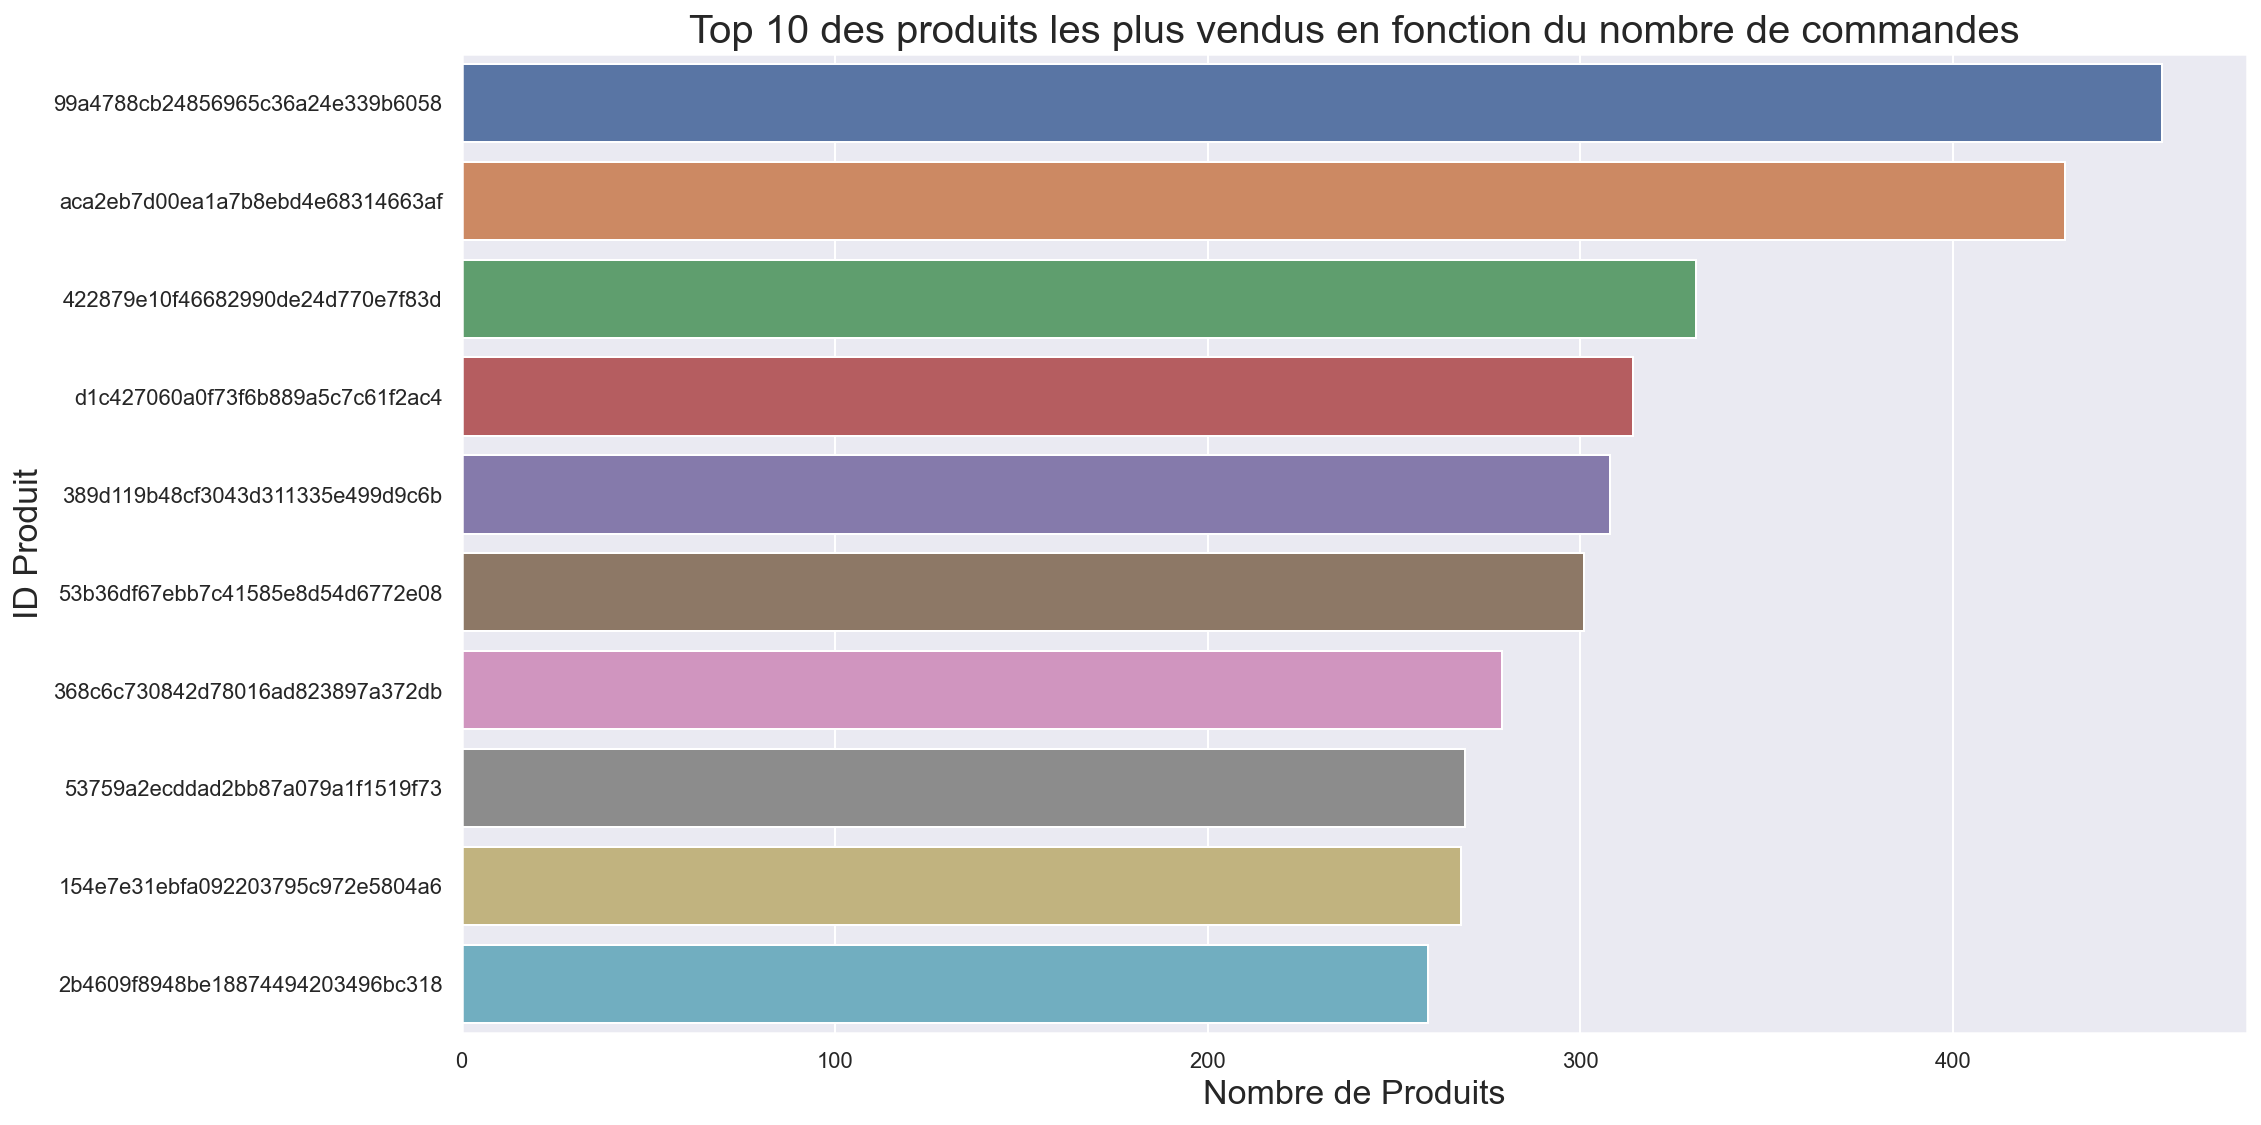

In [17]:
# Affichage des 10 produits les plus vendus
top_10_selling_products = olist['order_id'].groupby(olist['product_id']).count().sort_values(ascending=False)[:10]
fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_selling_products.index,x=top_10_selling_products.values)
plt.title('Top 10 des produits les plus vendus en fonction du nombre de commandes',fontsize=20)
plt.xlabel('Nombre de Produits',fontsize=17)
plt.ylabel('ID Produit',fontsize=17)

Le graphique représentant le nombre de produits vendus en fonction d'ID montre qu'il y a certains articles sont plus sollicités que d'autres d'où la représentation du graphe suivant.  
Les articles de première nécessité tels que "bed-bath-table" et "health-beauty" viennent en premier rang puis suivent ceux relatifs aux sports et divertissement ainsi que les ordinateurs et accessoires informatiques.  
En revanche, les autos et les jouets arrivent à la fin du classement.

Text(0, 0.5, 'Categorie du produit')

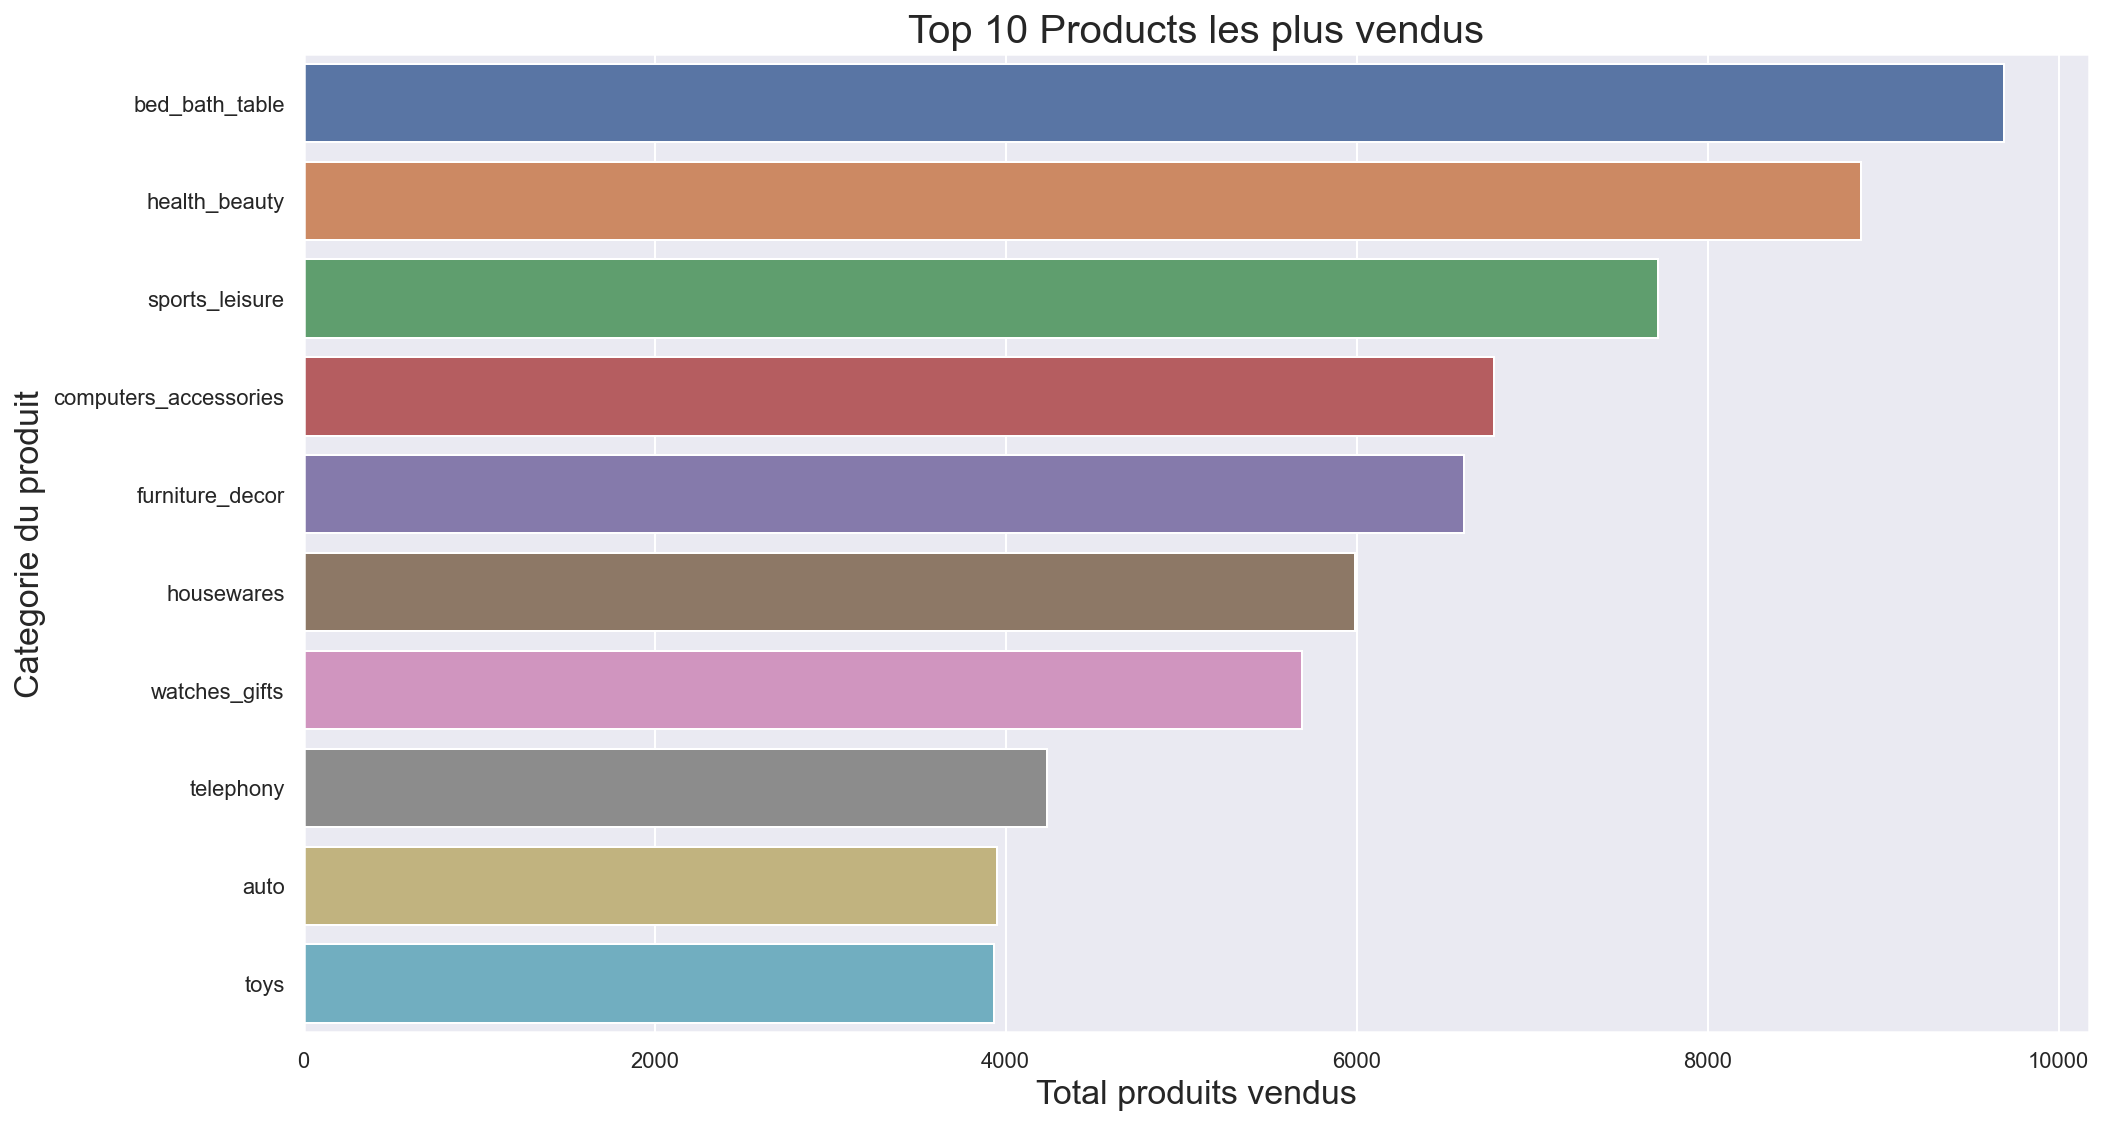

In [18]:
top_10_best_seller_products = olist['order_item_id'].groupby(olist['product_category_name_english']).sum().sort_values(ascending=False)[:10]

fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_best_seller_products.index,x=top_10_best_seller_products.values)
plt.title('Top 10 Products les plus vendus',fontsize=20)
plt.xlabel('Total produits vendus',fontsize=17)
plt.ylabel('Categorie du produit',fontsize=17)

Text(0, 0.5, 'ID Consommateur')

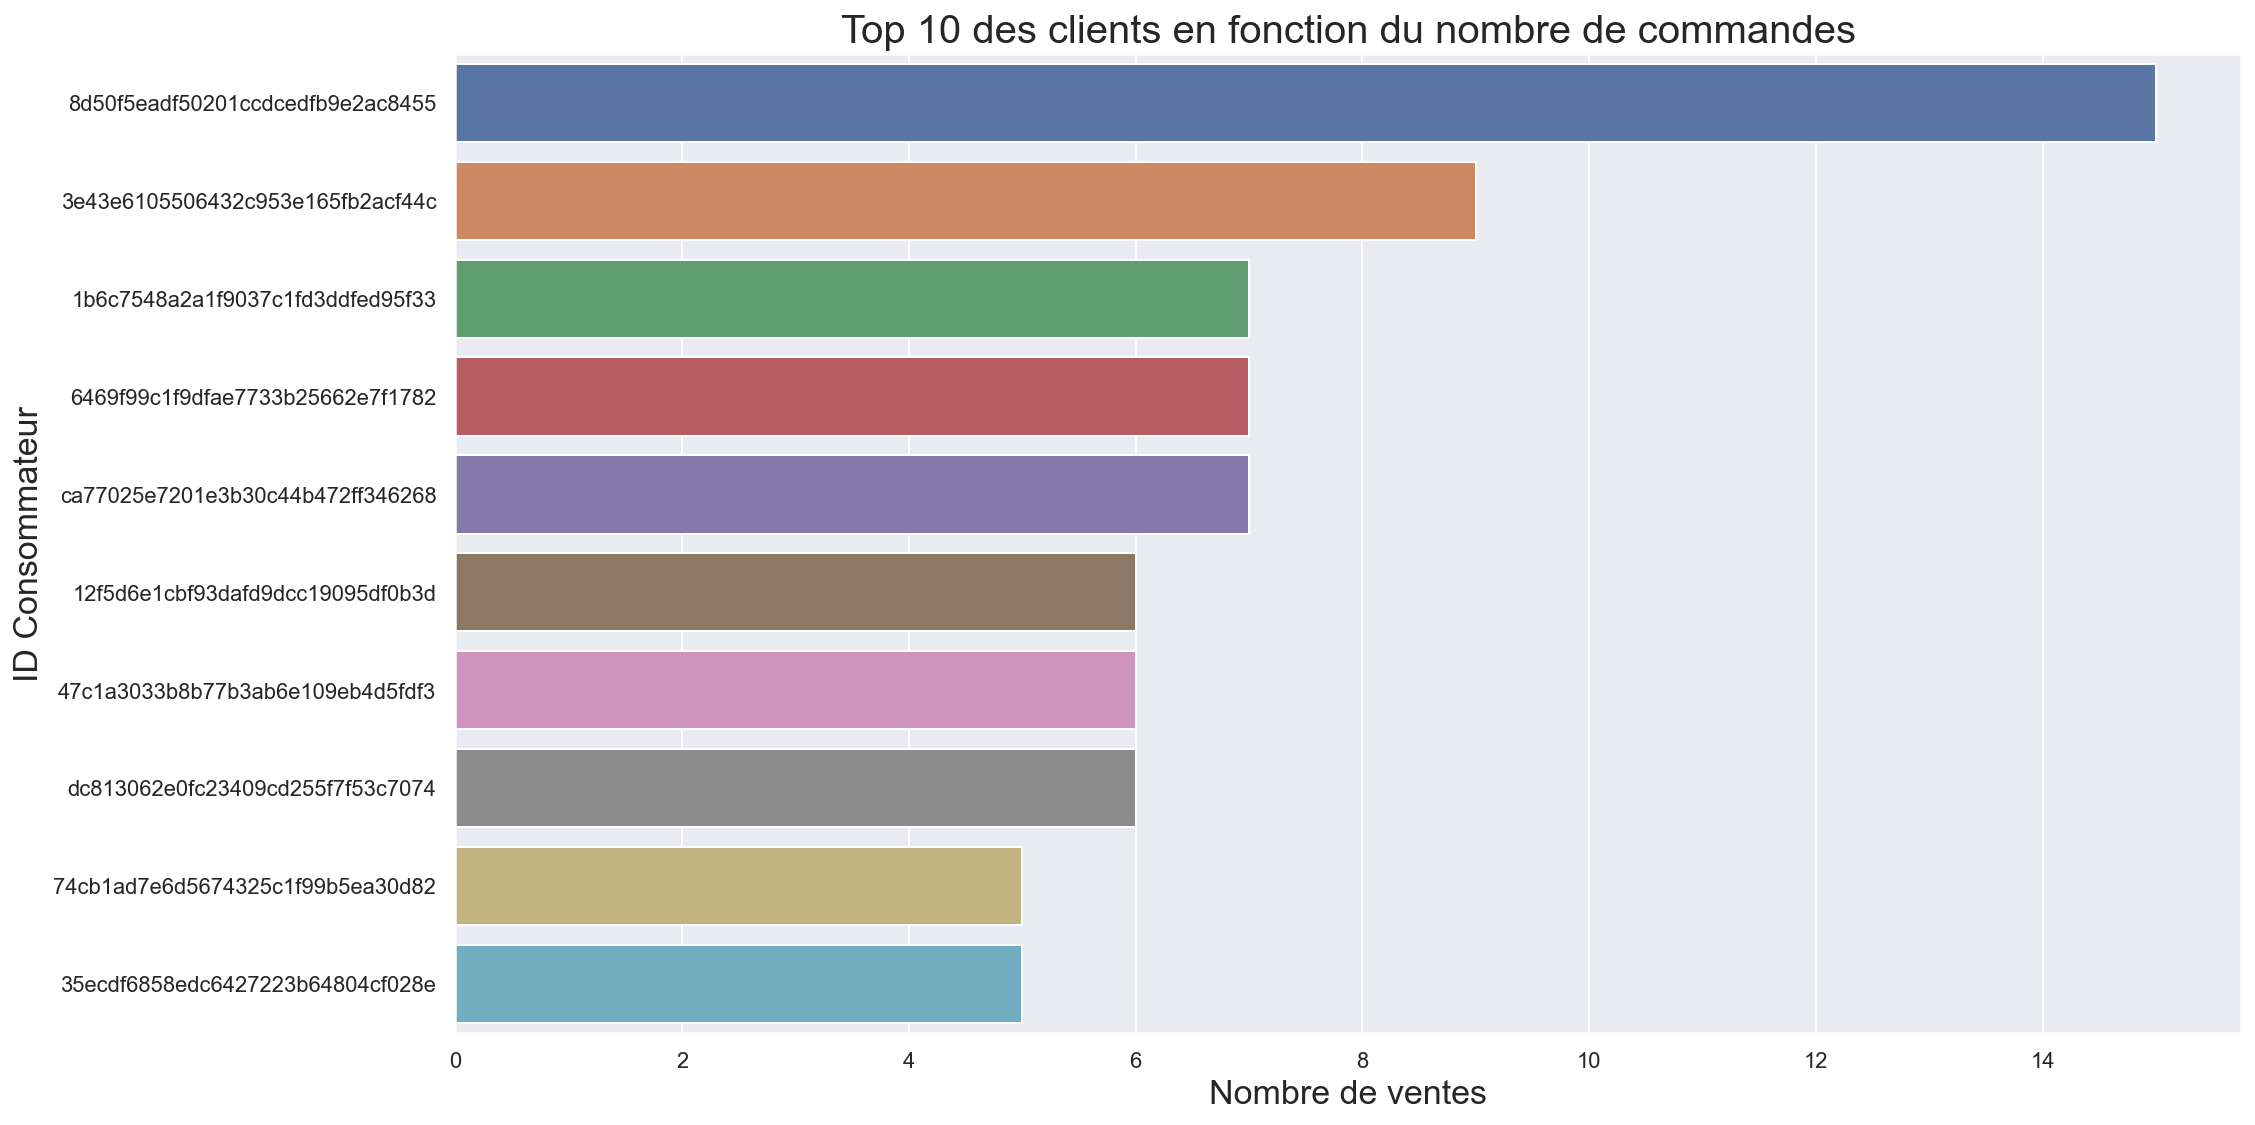

In [19]:
top_10_customer_shopping = olist['order_id'].groupby(olist['customer_unique_id']).count().sort_values(ascending=False)[:10]
fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_customer_shopping.index,x=top_10_customer_shopping.values)
plt.title('Top 10 des clients en fonction du nombre de commandes',fontsize=20)
plt.xlabel('Nombre de ventes',fontsize=17)
plt.ylabel('ID Consommateur',fontsize=17)

Les graphiques "Top 10 des clients en fonction du nombre de commandes" et "Top 10 des clients en fonction du montant des dépenses" montrent qu'il y a certains client qui achètent et dépensent le double des autres clients ce qui nous amène à vérifier les villes et états qui détiennent le plus grand nombre d'acheteurs via la plateforme olist.

Text(0, 0.5, 'ID Consommateur')

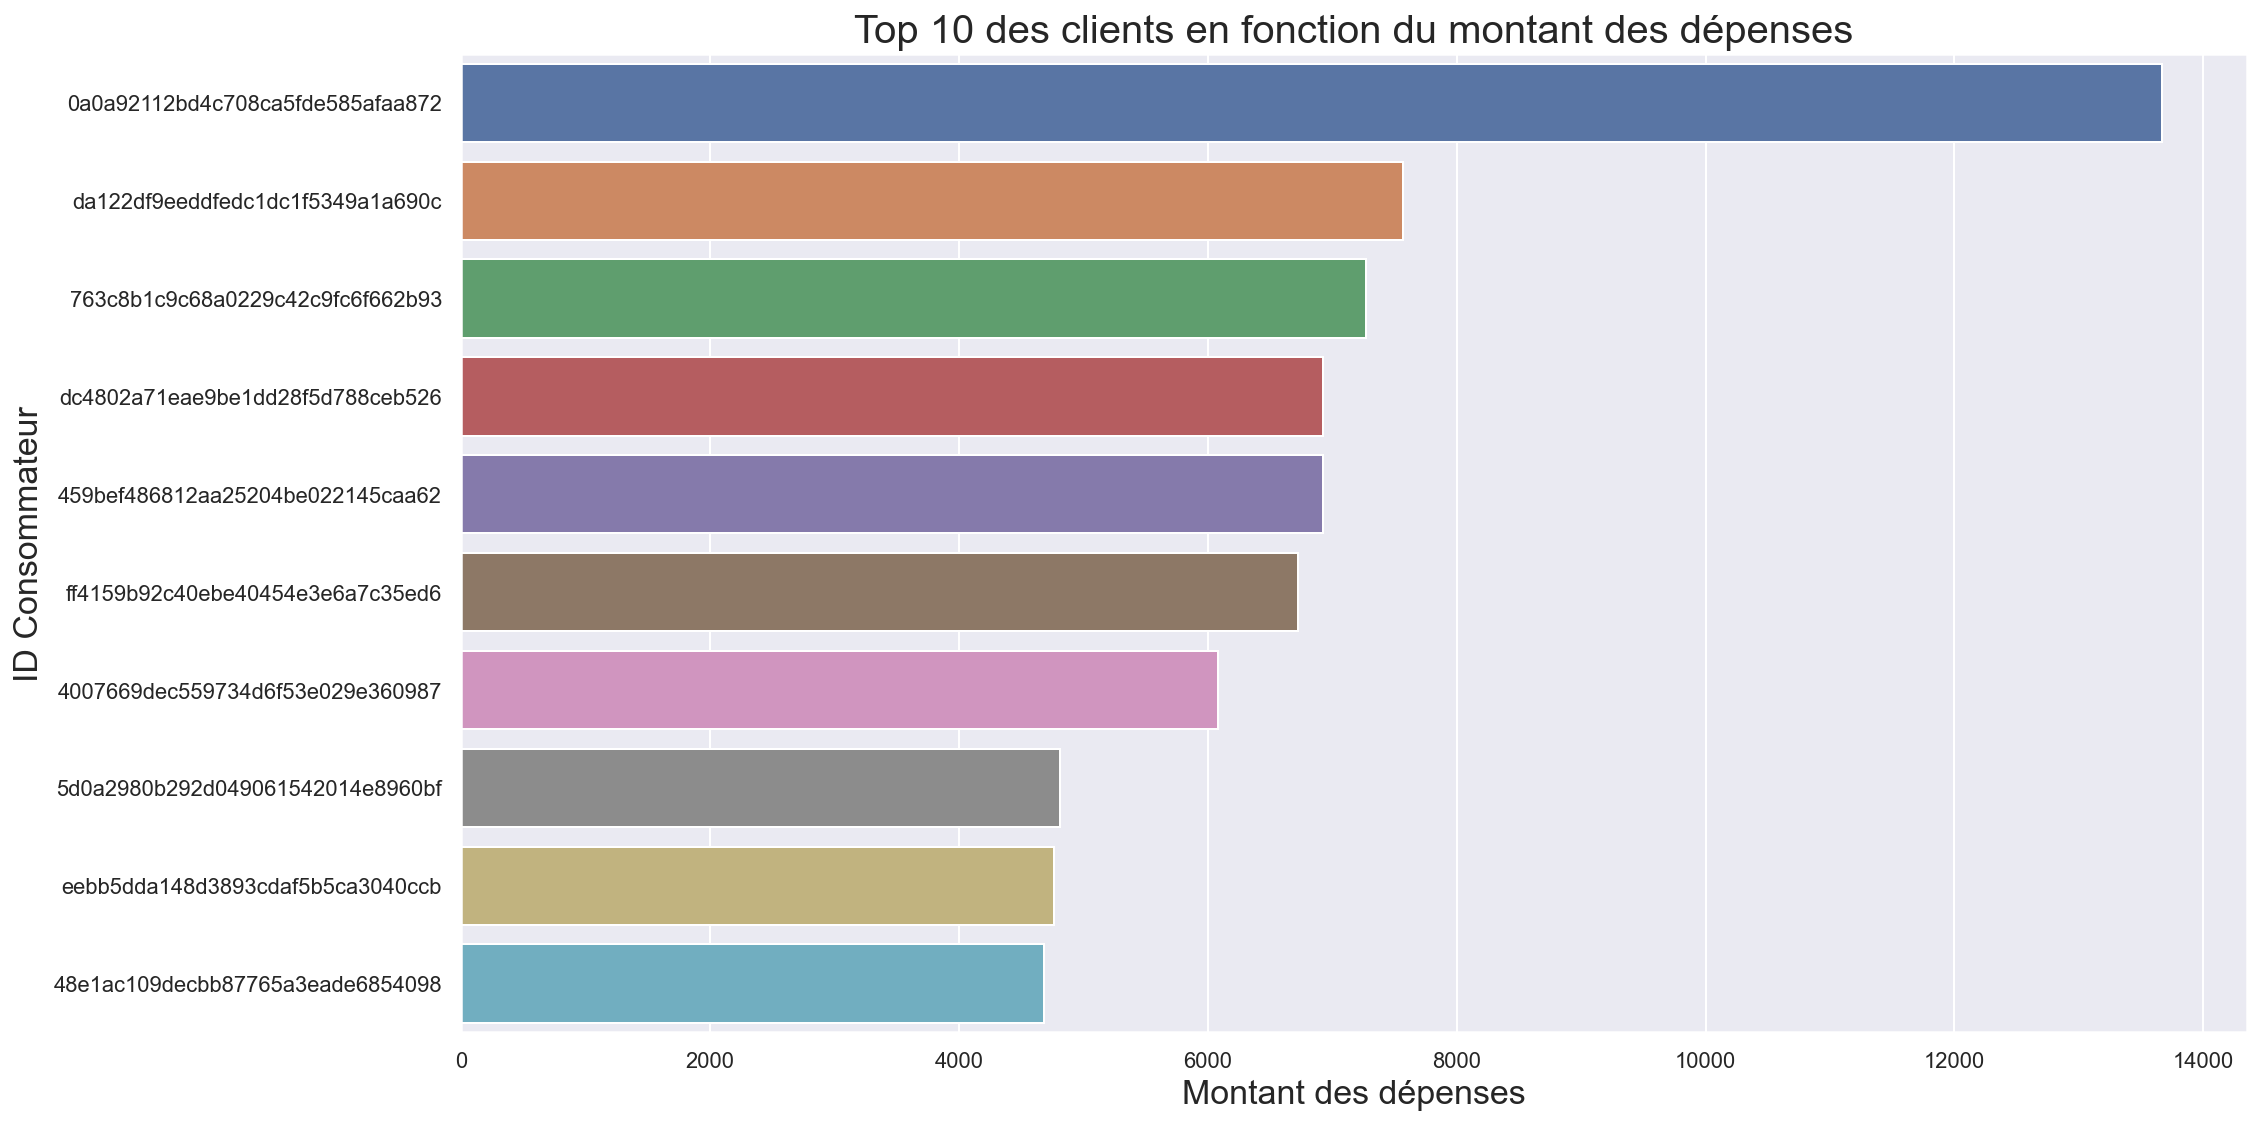

In [20]:
top_10_consumer_spendings = olist['payment_value'].groupby(olist['customer_unique_id']).sum().sort_values(ascending=False)[:10]
fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_consumer_spendings.index,x=top_10_consumer_spendings.values)
plt.title('Top 10 des clients en fonction du montant des dépenses',fontsize=20)
plt.xlabel('Montant des dépenses',fontsize=17)
plt.ylabel('ID Consommateur',fontsize=17)

Les deux graphes "Top 10 des états des clients en fonction du nombre de commandes" et "Top 10 des villes en fonction du nombre de commandes" confirment qu'il y a certains  états et villes dont les résidents possèdent un plus grand pouvoir d'achat. On retrouve à la tête Sao Paulo et Rio de Janeiro.

Text(0, 0.5, 'Etat du Consommateur')

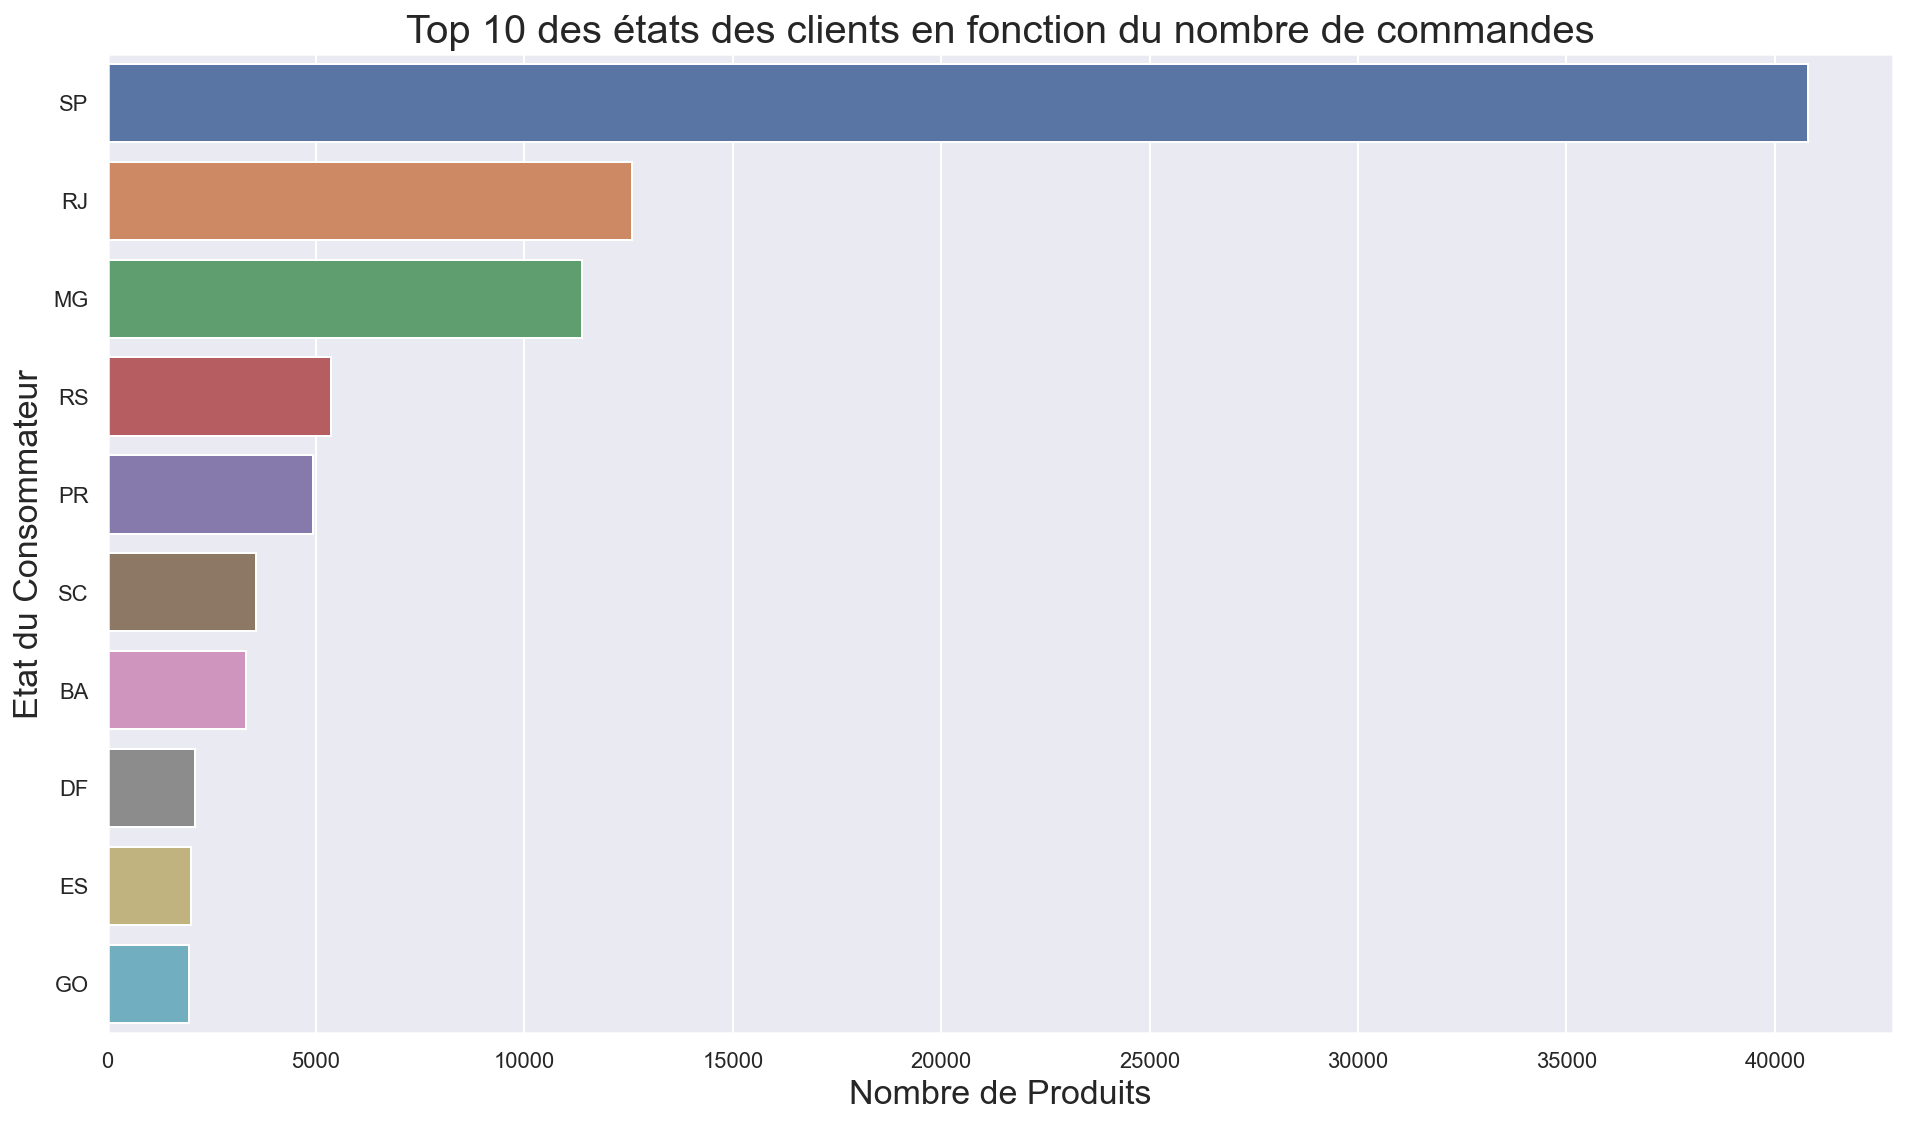

In [21]:
top_10_customer_state = olist['order_item_id'].groupby(olist['customer_state']).count().sort_values(ascending=False)[:10]
fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_customer_state.index,x=top_10_customer_state.values)
plt.title('Top 10 des états des clients en fonction du nombre de commandes',fontsize=20)
plt.xlabel('Nombre de Produits',fontsize=17)
plt.ylabel('Etat du Consommateur',fontsize=17)

Text(0, 0.5, 'Ville')

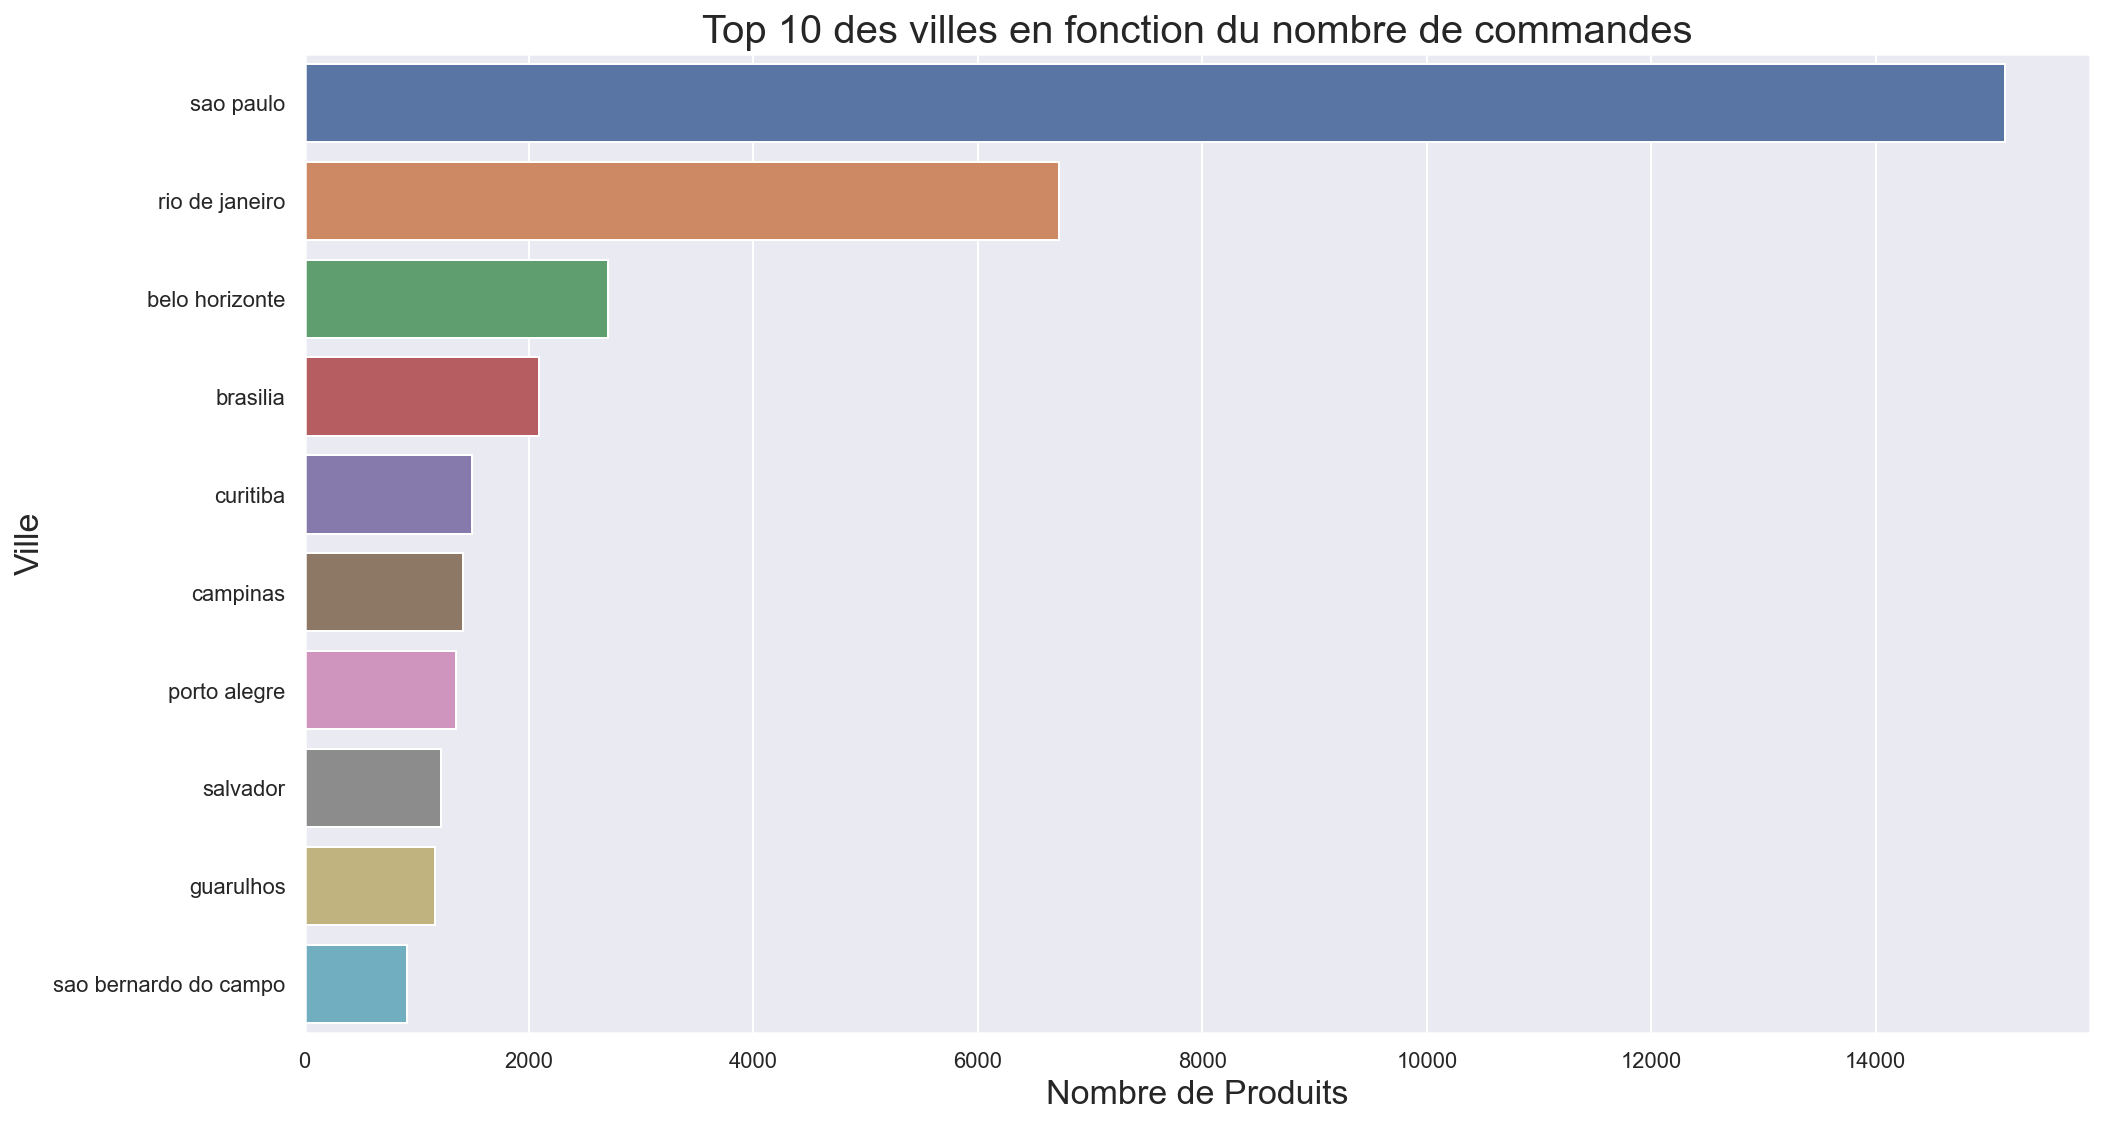

In [22]:
top_10_city=olist['order_id'].groupby(olist['customer_city']).count().sort_values(ascending= False)[:10]
fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_city.index,x=top_10_city.values)
plt.title('Top 10 des villes en fonction du nombre de commandes',fontsize=20)
plt.xlabel('Nombre de Produits',fontsize=17)
plt.ylabel('Ville',fontsize=17)

Il est intéressant par la suite de déterminer quel moyent de payement est le plus utilisé parmi les utilisateurs de la plateforme et le graphe suivant nommé "Type de Payement vs Montant Total" montre que quasi la totalité des achats se sont effectués à travers les cartes de crédits puis les billets "boleto".

Text(0.5, 1.0, 'Type de Payement vs Montant Total')

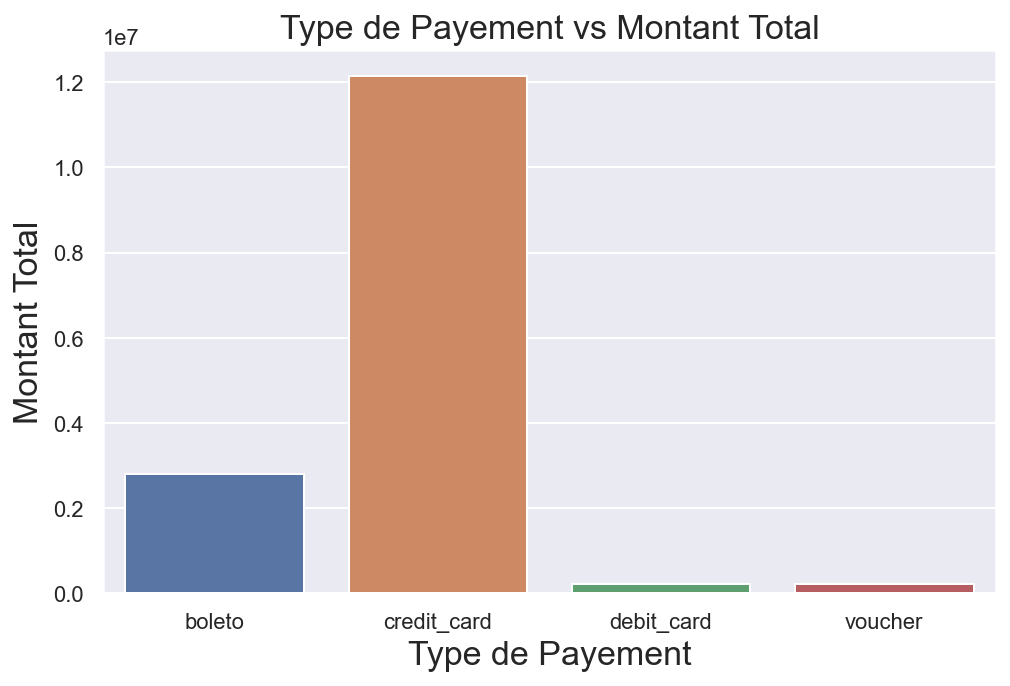

In [23]:
sum1=[]
group=[]
for groups,frame in olist.groupby('payment_type'):
    sum1.append(sum(frame['payment_value']))
    group.append(groups)
plt.figure()
sns.barplot(x=group,y=sum1)
plt.xlabel('Type de Payement',fontsize=17)
plt.ylabel('Montant Total',fontsize=17)
plt.title('Type de Payement vs Montant Total',fontsize=17)

## B - Modélisation et segmentation des clients 

### I - Création des variables RFM + segmentation manuelle

In [24]:
import datetime 
#olist.order_purchase_timestamp = pd.to_datetime (olist.order_purchase_timestamp)

anchorDate =  max(olist.order_purchase_timestamp) + datetime.timedelta(days=1)


#regroupe la récence, la fréquence et le montant par ID consommateur.
rfm = olist.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda x: (anchorDate - x.max()).days,
             'order_item_id': lambda x: len(x), 'payment_value': lambda x: x.sum()})
#             'order_id': 'count', 'payment_value': lambda x: x.sum()})


In [25]:
frequence = olist[['customer_unique_id', 'order_id']].groupby('customer_unique_id').nunique()
montant=olist[['customer_unique_id', 'payment_value']].groupby('customer_unique_id').sum()

In [26]:
rfm.rename(columns = {'order_purchase_timestamp' : 'Recency', 
                      'order_item_id' : 'Frequency', 
                      'payment_value' : 'Monetary'}, inplace = True)

rfm.tail()

,Recency,Frequency,Monetary
customer_unique_id,,,
fffcf5a5ff07b0908bd4e2dbc735a684,452,1.0,2067.42
fffea47cd6d3cc0a88bd621562a9d061,267,1.0,84.58
ffff371b4d645b6ecea244b27531430a,573,1.0,112.46
ffff5962728ec6157033ef9805bacc48,124,1.0,133.69
ffffd2657e2aad2907e67c3e9daecbeb,489,1.0,71.56


In [27]:
rfm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Recency,94087.0,242.902558,153.156396,1.00,119.00,223.00,352.00,729.00
Frequency,94087.0,1.033671,0.208938,1.00,1.00,1.00,1.00,15.00
Monetary,94087.0,163.471058,225.758490,0.01,61.59,106.16,181.51,13664.08


In [28]:
rfm['Frequency']=rfm['Frequency'].astype(int)

In [29]:
rfm.dtypes

Recency        int64
Frequency      int64
Monetary     float64
dtype: object

In [30]:
rfm['r_percentile'] = rfm['Recency'].rank(pct=True,ascending=False)
rfm['r_score'] = pd.qcut(rfm['r_percentile'], 4, labels=range(4,0,-1))

rfm['f_percentile'] = rfm['Frequency'].rank( method='first', pct=True, ascending=False)
#rfm['f_percentile'] = rfm['Frequency'].rank(pct=True,ascending=True)
rfm['f_score'] = pd.qcut(rfm['f_percentile'], 4, labels=range(4,0,-1))

rfm['m_percentile'] = rfm['Monetary'].rank(pct=True,ascending=False)
rfm['m_score'] = pd.qcut(rfm['m_percentile'], 4, labels=range(4,0,-1))


In [31]:
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)

In [32]:
rfm.tail(3)

,Recency,Frequency,Monetary,r_percentile,r_score,f_percentile,f_score,m_percentile,m_score,rfm_score
customer_unique_id,,,,,,,,,,
ffff371b4d645b6ecea244b27531430a,573,1,112.46,0.015385,4,0.999979,1,0.472897,3,413
ffff5962728ec6157033ef9805bacc48,124,1,133.69,0.736042,2,0.999989,1,0.389788,3,213
ffffd2657e2aad2907e67c3e9daecbeb,489,1,71.56,0.079437,4,1.000000,1,0.680705,2,412


#### - Segmentation Manuelle

On se propose de ségmenter les clients manuellement suivant les caractéristiques proposées dans le tableau récapitulatif suivant et qui se base sur le score Récence et la moyenne du score Fréquence et Montant:

In [33]:
data = {'Segments':  ['Meilleurs Clients', 'Clients fidèles','Clients récents', 'Clients à risque', 'A ne pas perdre', 'Clients perdus'],
        'Récence': ['3-4', '2-4','3-4', '1-2', '1' ,'1-2'],
        'Fréquence + Montant': ['3-4', '2-4','1-2', '2-3', '3-4','1-2']
        }

segments = pd.DataFrame (data, columns = ['Segments','Récence','Fréquence + Montant'])

print (segments)

            Segments Récence Fréquence + Montant
0  Meilleurs Clients     3-4                 3-4
1    Clients fidèles     2-4                 2-4
2    Clients récents     3-4                 1-2
3   Clients à risque     1-2                 2-3
4    A ne pas perdre       1                 3-4
5     Clients perdus     1-2                 1-2


In [34]:
def segmentation(r,f,m):
    moy=(f+m)/2
    ''' Créer les segments '''
    if (r==1) & (moy>=3) & (moy<=4) :
        val = 'A ne pas perdre'
    elif (r>=1) & (r<=2)  & (moy>=1) & (moy<=2) :
        val = 'Perdus'
    elif (r>=3) & (r<=4)  & (moy>=3) & (moy<=4) :
        val = 'Meilleurs'
    elif (r>=1) & (r<=2)  & (moy>2) & (moy<=3) :
        val = 'A risque'
    elif (r>=3) & (r<=4)  & (moy>=1) & (moy<=2) :
        val = 'Recents'
    elif (r>=2) & (r<=4)  & (moy>=2) & (moy<=4) :
        val = 'Fidèles'
    else:
        val = 'unknown'
    return val

In [35]:
rfm['Segment'] = rfm.apply(lambda x: segmentation ( x['r_score'],x['f_score'],x['m_score'] ),axis=1)

In [36]:
rfm['Segment'].value_counts()

Recents            18238
Perdus             17726
Meilleurs          17456
Fidèles            16227
A risque           15504
A ne pas perdre     8936
Name: Segment, dtype: int64

Les deux lignes suivantes permettentde vérifier que le nombre de clients est le même utilisé dans la segmentation.

In [37]:
sum(rfm['Segment'].value_counts())

94087

In [38]:
olist.customer_unique_id.nunique()

94087

La segmentation mannuelle indique que les ces trois catégories des clients "Récents", "Perdus" et Meilleurs sont à la tête des utilisateurs de la plateforme olist. Cependant, il y a une importante partie d'utilisateurs qui sont "A risque" et "A ne pas perdre".

Text(0, 0.5, 'Segments')

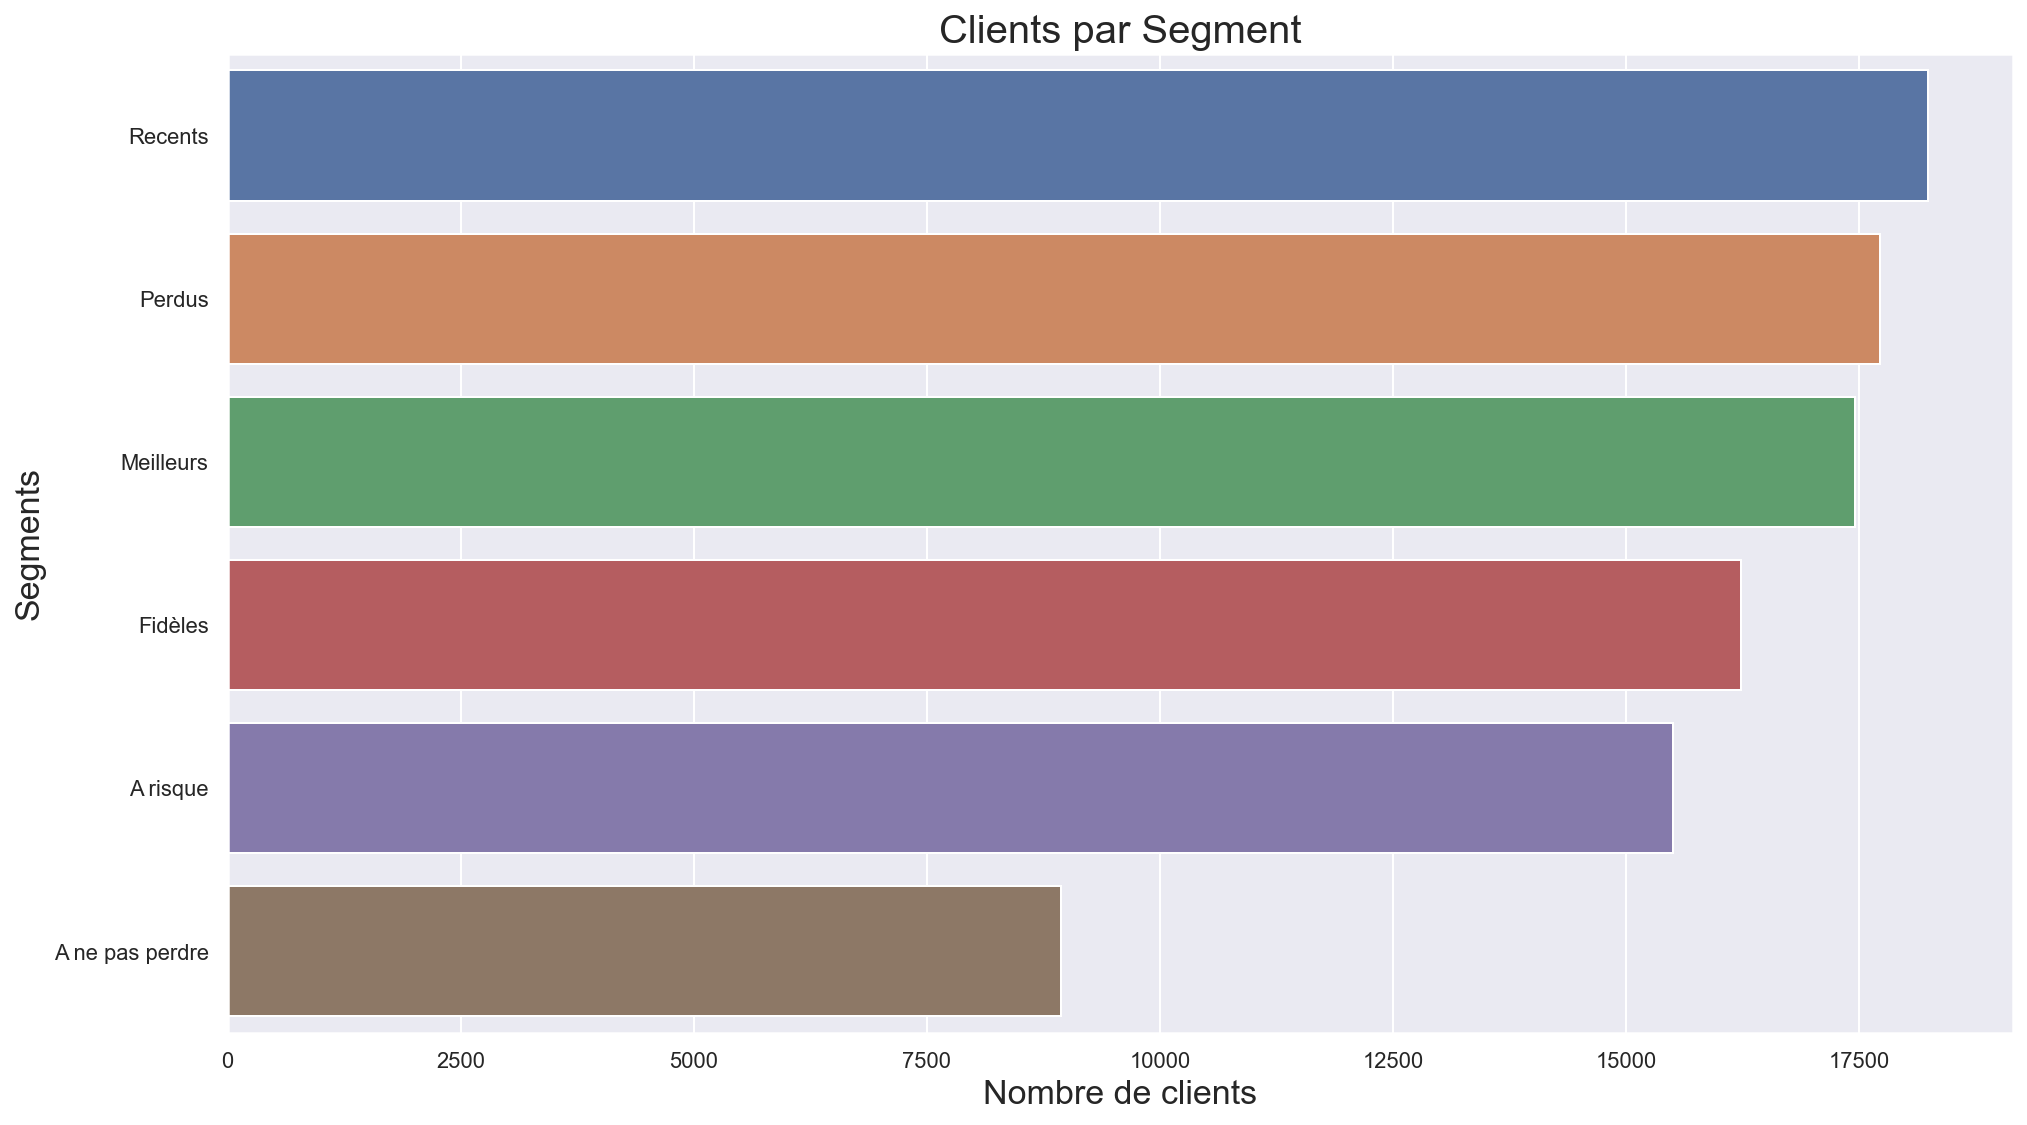

In [39]:
fig=plt.figure(figsize=(16,9))
sns.barplot(y=rfm['Segment'].value_counts().index,x=rfm['Segment'].value_counts().values)
plt.title('Clients par Segment',fontsize=20)
plt.xlabel('Nombre de clients',fontsize=17)
plt.ylabel('Segments',fontsize=17)

#### - Rajout  de nouvelles variables

A ce stade on se rend compte que la fréquence est inutile, d'où l'intérêt de rajouter de nouvelles variables qui semblent être plus pertinentes pour la segmentation.  
Les nouvelles variables sont le review score, le nombre de produits achetés par client et le nombre de villes.

In [40]:
x = olist[['customer_unique_id', 'review_score']].groupby('customer_unique_id').sum()
y = olist[['customer_unique_id', 'review_score']].groupby('customer_unique_id').nunique()
rfm['review_score'] = (x/y).astype(int)
rfm['nbr_produits']=olist[['customer_unique_id','product_id']].groupby('customer_unique_id').nunique()/olist.customer_unique_id.nunique()
# Nombre de produit moyen acheté par chaque client
rfm['nb_cities']=olist['customer_city'].groupby(olist['customer_unique_id']).count()

In [41]:
#(olist['customer_city'].groupby(olist['customer_unique_id']).value_counts().values>=2).count()

a = olist['customer_city'].groupby(olist['customer_unique_id']).value_counts()

unique, counts = np.unique(a, return_counts=True)

#dict(zip(unique, counts))

In [42]:
selected_columns = rfm[['Recency', 'Monetary', 'review_score','nbr_produits','nb_cities']]
rfm_table=selected_columns.copy()
#rfm_=rfm[['r_score', 'm_score', 'review_score','nbr_produits','nb_cities']].copy()
#rfm_[['r_score', 'm_score']].astype(int)

### II - Segmentation avec K-means

In [43]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()

#from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



Dans ce qui suit, on calcule la métrique «coefficient de silhouette » pour différents nombres de groupes issus de la méthode des centres mobiles.

In [44]:
rfm_=rfm[['Recency', 'Monetary', 'review_score','nbr_produits','nb_cities']].copy()
#rfm_ = scaler.fit_transform(_rfm_) # variables normalized
#rfm_[['r_score', 'm_score']].astype(int)

In [45]:
#------------------Segmentation Kmeans----------------

# This particular setting has one distinct cluster and 3 clusters placed close
# together.

 # Run the kmeans algorithm
    #km = KMeans(n_clusters=k)
    #y_predict = km.fit_predict(df1)
    #centroids  = km.cluster_centers_

silh_centroids=[]
silh_scores=[]
silh_samples=[]
silh_labels=[]
kmeans_labels=[]

#______________Adapter les hyperparamètres d'un algorithme non supervisé afin de l'améliorer
range_n_clusters = [3, 4, 5,6, 7,8]

stscaler = StandardScaler().fit(rfm_)
X = stscaler.transform(rfm_)

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X) # y_predict
    labels = clusterer.labels_ # 
    kmeans_labels.append(labels)



#    cluster_labels = clusterer.fit_predict(rfm_) # y_predict
    centroids  = clusterer.cluster_centers_
    #print("For n_clusters =", n_clusters, "\nCentroids = ", centroids)
    silh_centroids.append(centroids)
    silh_labels.append(cluster_labels)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, sample_size=5000)

#    silhouette_avg = silhouette_score(rfm_, cluster_labels, sample_size=5000)
#   # silhouette_vals = silhouette_samples(df,y_predict)
    print("For n_clusters =", n_clusters,"\nThe average silhouette_score is :", silhouette_avg)
    silh_scores.append(silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)    

#    sample_silhouette_values = silhouette_samples(rfm_, cluster_labels)    
    #print("For n_clusters =", n_clusters,   "\nsample silhouette values = ", sample_silhouette_values)
    silh_samples.append(sample_silhouette_values)

For n_clusters = 3 
The average silhouette_score is : 0.33191142196818707
For n_clusters = 4 
The average silhouette_score is : 0.354748709139073
For n_clusters = 5 
The average silhouette_score is : 0.4136849441408037
For n_clusters = 6 
The average silhouette_score is : 0.4297430491197534
For n_clusters = 7 
The average silhouette_score is : 0.42206199602732497
For n_clusters = 8 
The average silhouette_score is : 0.3492940675590859


In [46]:
def affichage_silh(n_clusters, sample_silhouette_values, centers, X,cluster_labels):   
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    #centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

Best n_clusters:  6


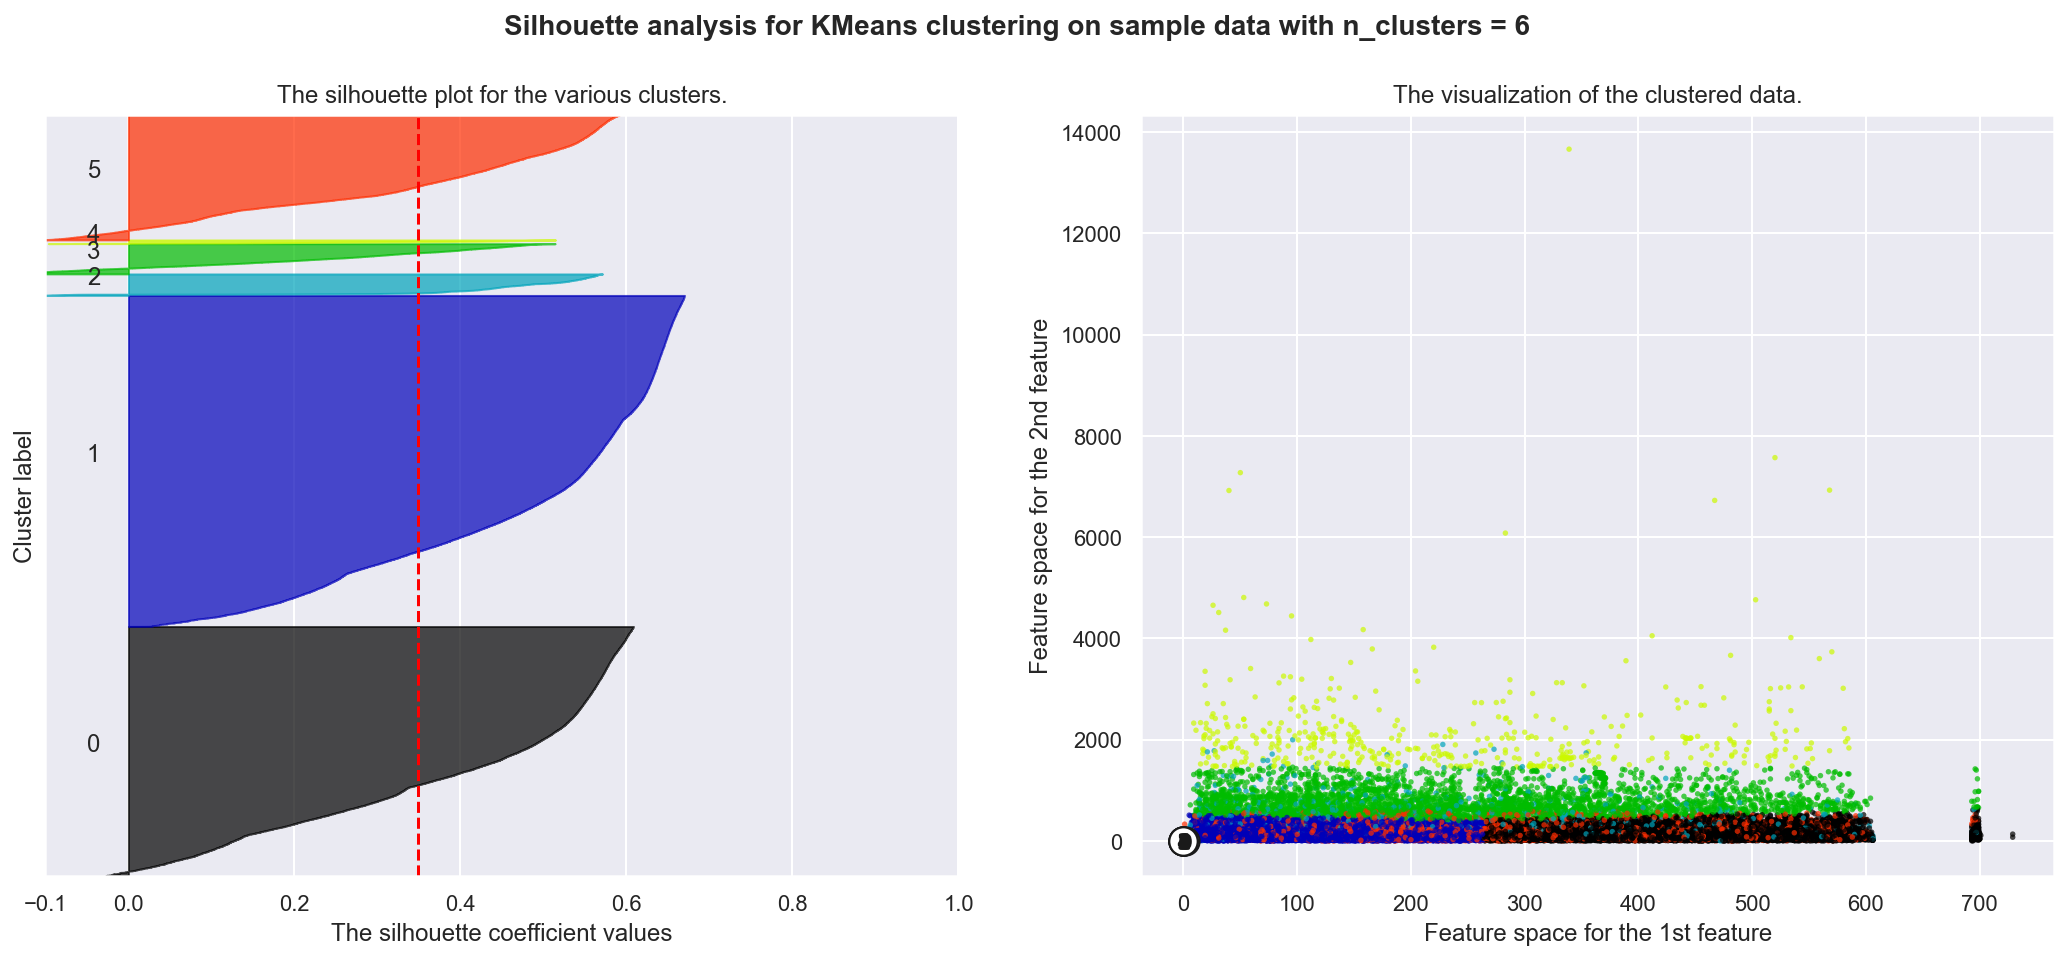

In [47]:
max_ind=silh_scores.index(max(silh_scores))
print("Best n_clusters: ", range_n_clusters[max_ind])
affichage_silh(range_n_clusters[max_ind], silh_samples[max_ind],silh_centroids[max_ind], rfm_,silh_labels[max_ind])

On remarque la présence de catégories avec des scores de silhouette supérieurs à la moyenne.

Il y a des fluctuations dans la taille des graphiques de silhouette.


Il n'y a pas de phénomène d'écrasement.


Le score de silhouette pour chaque groupe est supérieur aux scores de silhouette moyens. Cependant, la fluctuation de la taille n'est pas similaire (uniforme) bien que l'épaisseur du tracé de silhouette représentant chaque cluster est un point décisif.   

Les composantes 0, 1, 5 sont les plus imporatantes.

La 2ième, 3ième et la 4ième composante sont les plus petites,

=> Les catégories sont denses et moyennement séparées.

In [48]:
from sklearn import decomposition

def visualisationACP(X, clusters, case):
    X= preprocessing.StandardScaler().fit_transform(X)# X_scaled
    # Affichage du clustering par projection des individus sur le premier plan factoriel
    pca = decomposition.PCA(n_components=3).fit(X)
    if case ==1 :
        X_projected = pca.transform(X)
        plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
        plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
    else: 
       # Affichage des positions des centres de classes
        centroids = clusters
        centroids_projected = pca.transform(centroids)
        plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
        plt.title("Projection des {} centroides sur le 1e plan factoriel".format(len(centroids)))
    plt.show(block=False)

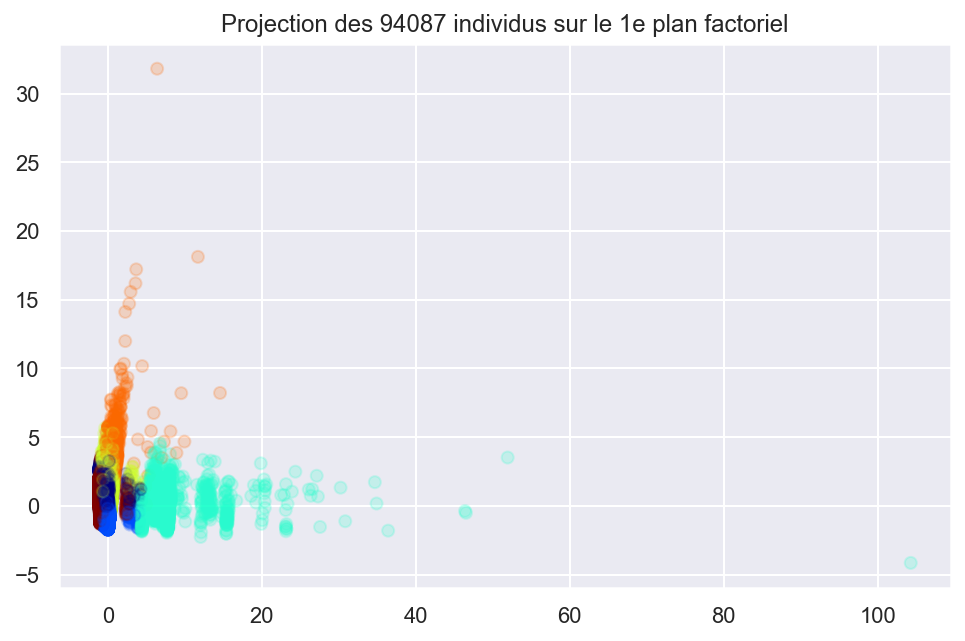

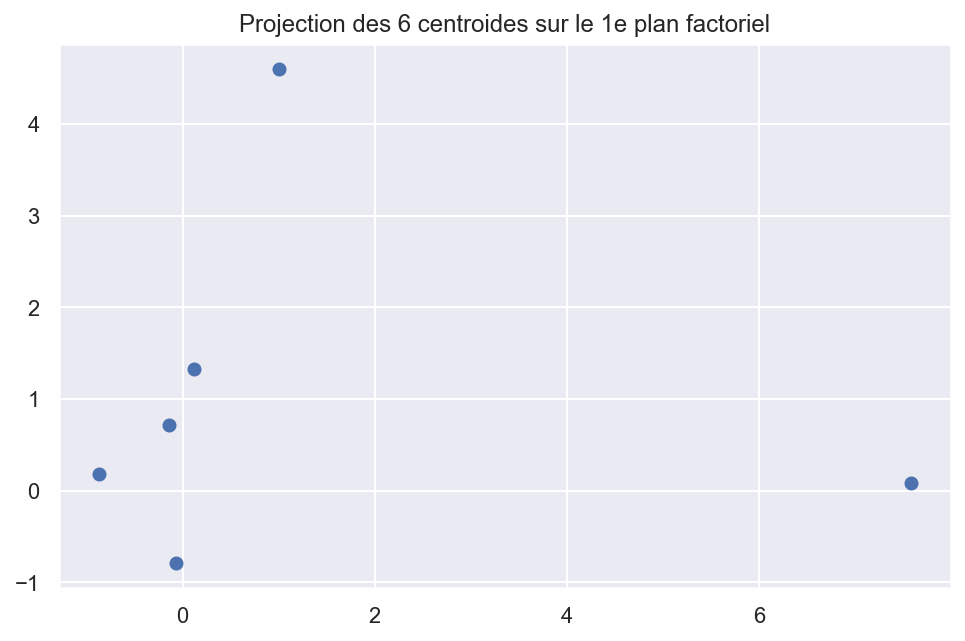

In [49]:
#  Visualisation ACP
visualisationACP (rfm_, kmeans_labels[max_ind], 1)# individus
visualisationACP (rfm_, silh_centroids[max_ind],2)# centroides

Nous avons affiché les données sur le premier plan factoriel, puis coloré les points en fonction de leur cluster.

In [50]:
rfm_['kmeansCluster'] =kmeans_labels[max_ind]

In [51]:
# Répartition des utilisateurs selon les catégories
rfm_['kmeansCluster'].value_counts()

1    40950
0    30808
5    15496
3     3736
2     2647
4      450
Name: kmeansCluster, dtype: int64

#### - Description actionnable de la segmentation avec KMEANS

Text(0.5, 0, 'Segments')

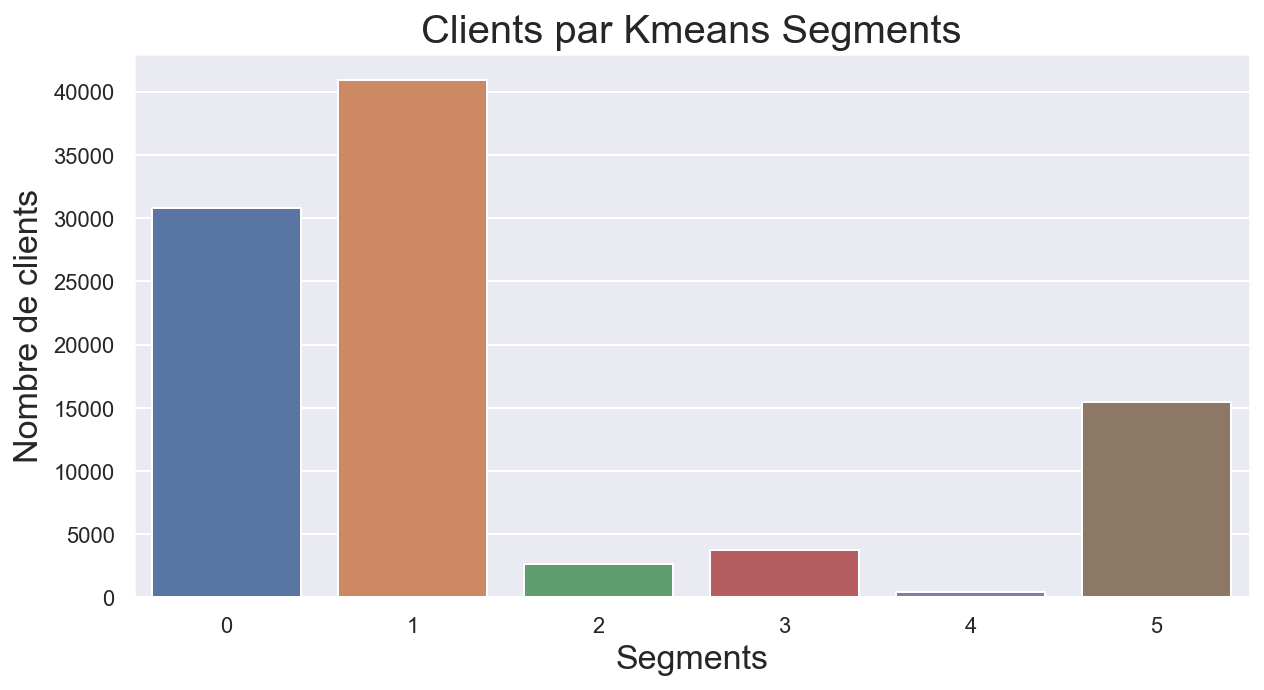

In [52]:
fig=plt.figure(figsize=(10,5))
sns.barplot(x=rfm_['kmeansCluster'].value_counts().index,y=rfm_['kmeansCluster'].value_counts().values)
plt.title('Clients par Kmeans Segments',fontsize=20)
plt.ylabel('Nombre de clients',fontsize=17)
plt.xlabel('Segments',fontsize=17)

In [53]:
rfm_['Recency'].astype(int)
rfm_['Monetary'].astype(int)

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2     141
0000b849f77a49e4a4ce2b2a4ca5be3f      27
0000f46a3911fa3c0805444483337064      86
0000f6ccb0745a6a4b88665a16c9f078      43
0004aac84e0df4da2b147fca70cf8255     196
                                    ... 
fffcf5a5ff07b0908bd4e2dbc735a684    2067
fffea47cd6d3cc0a88bd621562a9d061      84
ffff371b4d645b6ecea244b27531430a     112
ffff5962728ec6157033ef9805bacc48     133
ffffd2657e2aad2907e67c3e9daecbeb      71
Name: Monetary, Length: 94087, dtype: int64

Text(0.5, 0, 'ID Cluster')

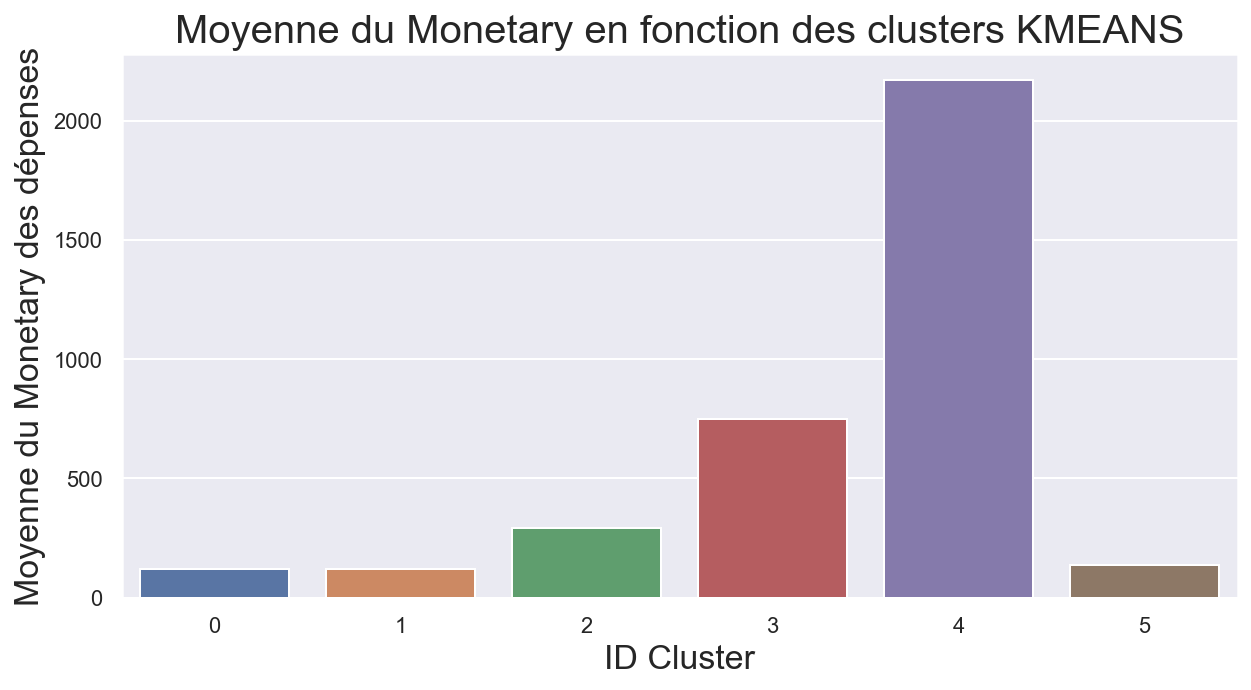

In [54]:
_spendings = rfm_['Monetary'].astype(int).groupby(rfm_['kmeansCluster']).mean().sort_values(ascending=False)
fig=plt.figure(figsize=(10,5))
sns.barplot(x=_spendings.index,y=_spendings.values)
plt.title('Moyenne du Monetary en fonction des clusters KMEANS',fontsize=20)
plt.ylabel('Moyenne du Monetary des dépenses',fontsize=17)
plt.xlabel('ID Cluster',fontsize=17)

Text(0.5, 0, 'ID Cluster')

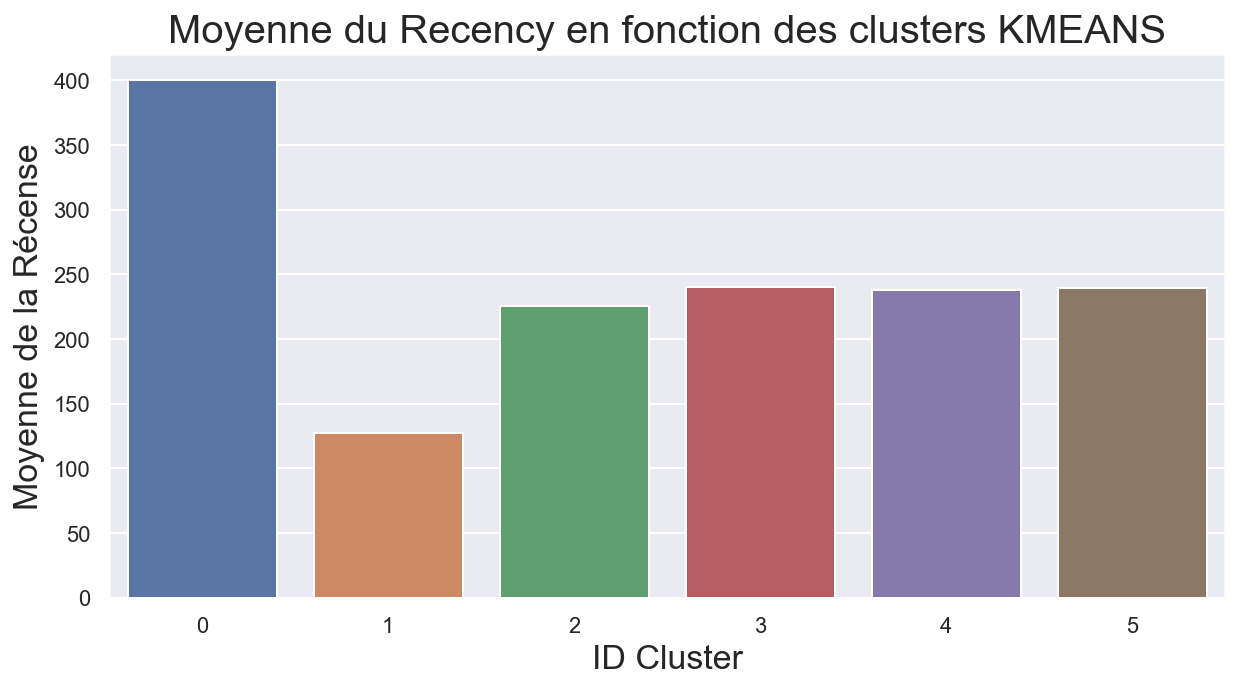

In [55]:
_recence = rfm_['Recency'].astype(int).groupby(rfm_['kmeansCluster']).mean().sort_values(ascending=False)
fig=plt.figure(figsize=(10,5))
sns.barplot(x=_recence.index,y=_recence.values)
plt.title('Moyenne du Recency en fonction des clusters KMEANS',fontsize=20)
plt.ylabel('Moyenne de la Récense',fontsize=17)
plt.xlabel('ID Cluster',fontsize=17)

Text(0.5, 0, 'ID Cluster')

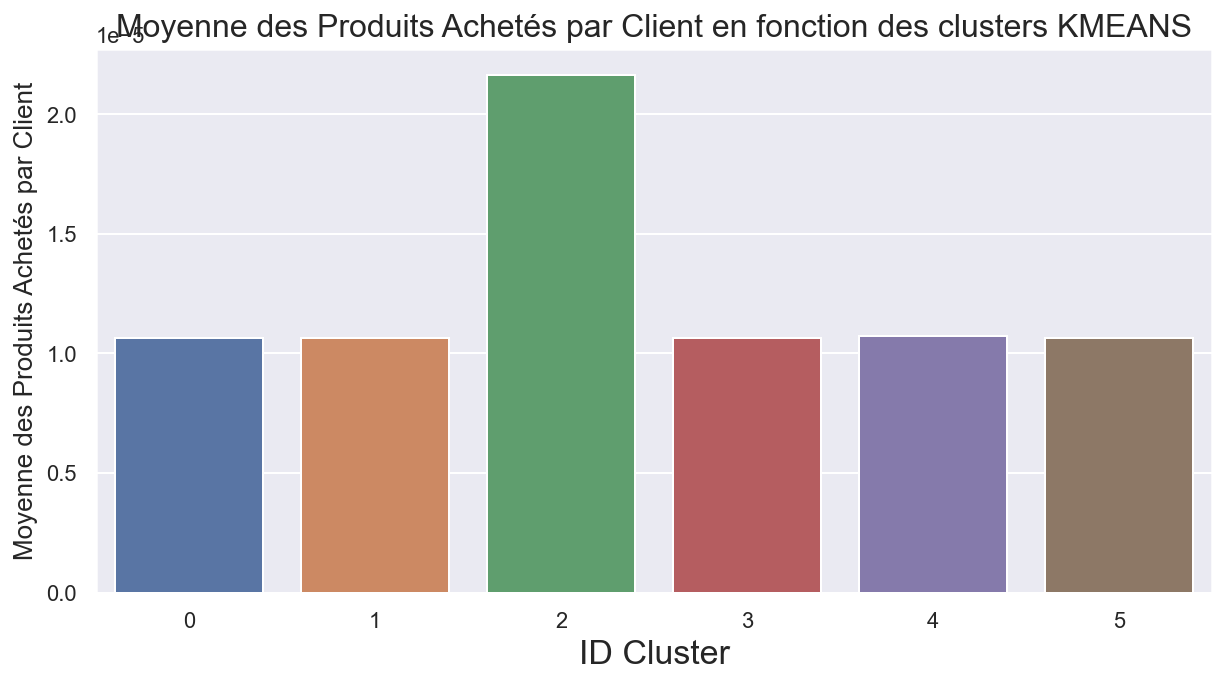

In [56]:
_produits = rfm_['nbr_produits'].groupby(rfm_['kmeansCluster']).mean()
fig=plt.figure(figsize=(10,5))
sns.barplot(x=_produits.index, y=_produits.values)
plt.title('Moyenne des Produits Achetés par Client en fonction des clusters KMEANS',fontsize=16)
plt.ylabel('Moyenne des Produits Achetés par Client',fontsize=13)
plt.xlabel('ID Cluster',fontsize=17)

Text(0.5, 0, 'ID Cluster')

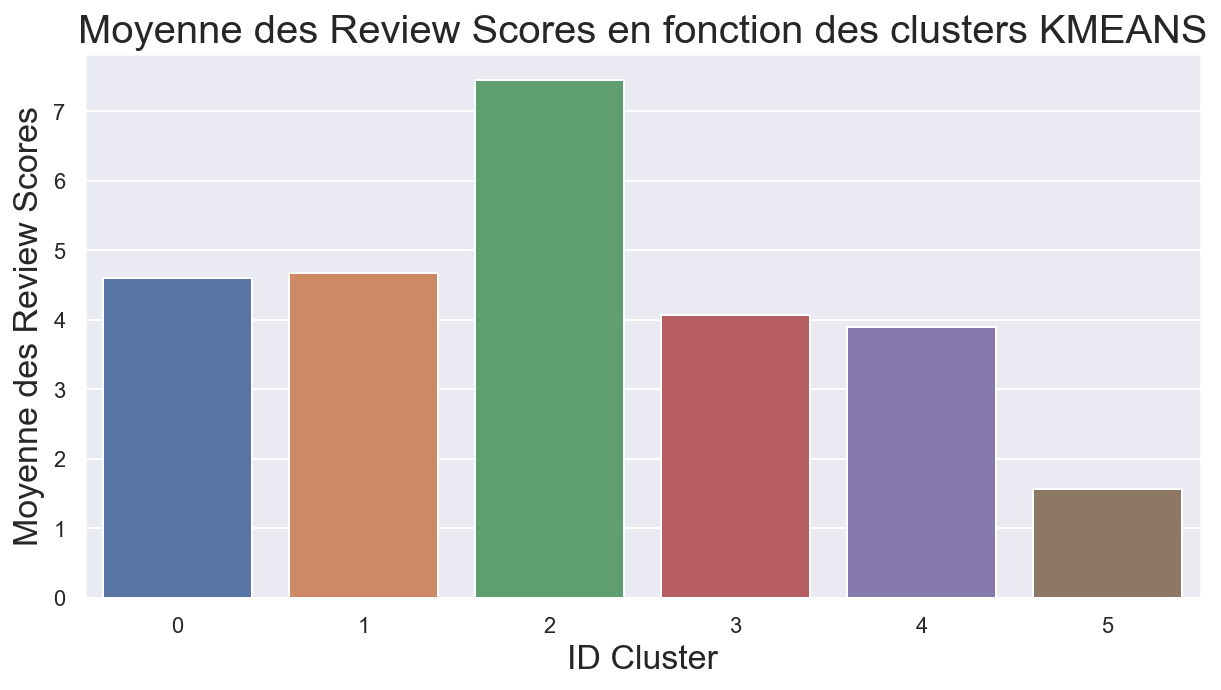

In [57]:
_review = rfm_['review_score'].groupby(rfm_['kmeansCluster']).mean()
fig=plt.figure(figsize=(10,5))
sns.barplot(x=_review.index,y=_review.values)
plt.title('Moyenne des Review Scores en fonction des clusters KMEANS',fontsize=20)
plt.ylabel('Moyenne des Review Scores',fontsize=17)
plt.xlabel('ID Cluster',fontsize=17)

Text(0.5, 0, 'ID Cluster')

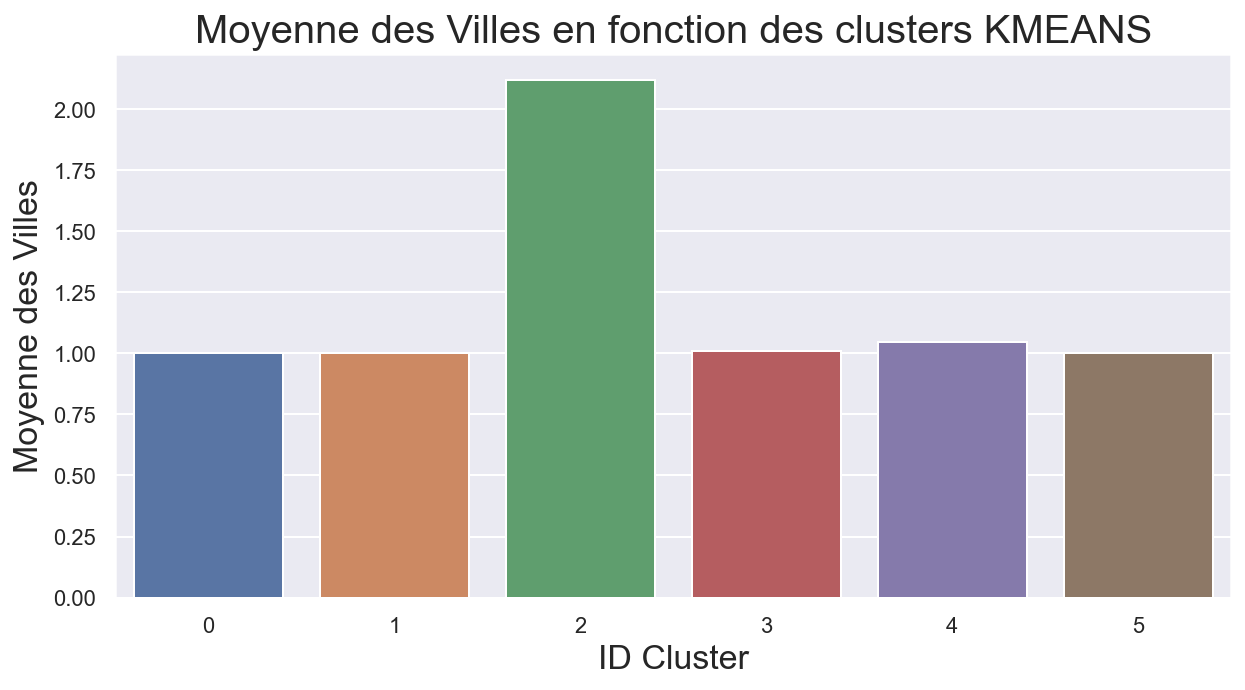

In [58]:
_cities = rfm_['nb_cities'].groupby(rfm_['kmeansCluster']).mean()
fig=plt.figure(figsize=(10,5))
sns.barplot(x=_cities.index,y=_cities.values)
plt.title('Moyenne des Villes en fonction des clusters KMEANS',fontsize=20)
plt.ylabel('Moyenne des Villes',fontsize=17)
plt.xlabel('ID Cluster',fontsize=17)

- Cluster 5 : Consommateurs à risque (non satisfaits et n'achètent pas souvent)
- Cluster 4 : Meilleurs consommateurs, il achètent souvent et ils sont actifs
- Cluster 3 : Consommateurs réguliers
- Cluster 2 : Les consommateurs à développer
- Cluster 1 : Consommateurs perdus (la majorité de la base: n'achètent plus et dépensent le minimum)
- Cluster 0 : Nouveaux consommateurs (Ils ont commencé à acheter)

### III - Segmentation avec DBSCAN 

Lors de l'étude de la modélisation avec DBSCAN on utilse un sous échantillons de 5000 clients.

In [59]:
rfm__=rfm_[:5000].copy()

In [60]:
rfm__.shape

(5000, 6)

In [61]:
# Normalisation des données
stscaler = StandardScaler().fit(rfm__)
X = stscaler.transform(rfm__)

from sklearn import metrics
dbsc_labels=[]
dbsc_core_samples=[]
dbsc_n_clusters_=[]
dbsc_score_silhouette=[]
dbsc_noise=[]
dbsc_mask=[]

#epsilons = [ .05, .1, .15, .2, .25, .3]
epsilons = [0.2, 0.25, 0.3, 2, 4, 5]


#epsilons = [6, 7, 7.5, 7.75, 8]

for eps in epsilons:
    #X = rfm_#load the data
    #clustering = DBSCAN(eps=3, min_samples=2).fit_predict(X)
    #dbscan = DBSCAN(eps=5.5, min_samples=190)


    dbsc = DBSCAN(eps, min_samples=20).fit(X)
    
    core_samples_mask = np.zeros_like(dbsc.labels_, dtype=bool)
    core_samples_mask[dbsc.core_sample_indices_] = True
    dbsc_mask.append(core_samples_mask)
    
    #Storing the labels formed by the DBSCAN
    labels = dbsc.labels_
    dbsc_labels.append(labels)
    # measure the performance of dbscan algo
    #Identifying which points make up our “core points”
    core_samples = np.zeros_like(labels, dtype=bool)
    core_samples[dbsc.core_sample_indices_] = True
    print(core_samples)
    dbsc_core_samples.append(core_samples)
    #Calculating "the number of clusters"
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print(n_clusters_)
    dbsc_n_clusters_.append(n_clusters_ )
    dbsc_noise.append(n_noise_)
    #Computing "the Silhouette Score"
    score=metrics.silhouette_score(X, labels, sample_size=5000)
    print("Silhouette Coefficient: %0.3f" %score )
    dbsc_score_silhouette.append(score)
    

[ True  True False ... False  True  True]
10
Silhouette Coefficient: 0.155
[ True  True False ... False  True  True]
10
Silhouette Coefficient: 0.175
[ True  True False ... False  True  True]
9
Silhouette Coefficient: 0.190
[ True  True  True ...  True  True  True]
3
Silhouette Coefficient: 0.716
[ True  True  True ...  True  True  True]
2
Silhouette Coefficient: 0.732
[ True  True  True ...  True  True  True]
2
Silhouette Coefficient: 0.732


In [62]:
def plot_dbscan(labels,core_samples_mask,n_clusters_ ):
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of DBSCAN clusters: %d' % n_clusters_)
    plt.show()

4


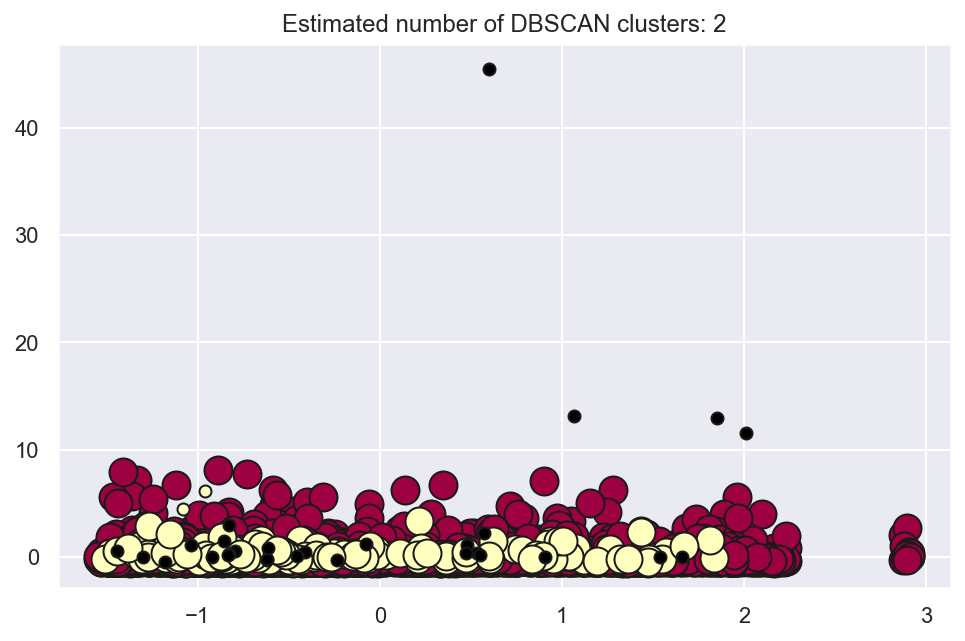

In [63]:
max_ind=dbsc_score_silhouette.index(max(dbsc_score_silhouette))
print(max_ind)
plot_dbscan(dbsc_labels[max_ind],dbsc_mask[max_ind] ,dbsc_n_clusters_[max_ind])

Avec DBSCAN, on n'arrive pas à obtenir une bonne classification puisque les clusters sont confondus bien que le Silhouette Score atteint 0.7.
Le résultat obtenu avec KMeans est meilleur pour la différentiation des catégories même pour un score plus faible.
Explication dans la littéraure:  
Silhouette suppose des clusters convexes, mais DBSCAN ne génère pas de clusters convexes.

L'implémentation sklearn traite probablement le bruit comme un cluster, ce qui donnera généralement de pires résultats. Mais Silhouette n'est pas vraiment destiné à être utilisé avec des étiquettes de bruit

In [64]:
rfm__['dbsCluster'] =dbsc_labels[max_ind]

In [65]:
rfm__

,Recency,Monetary,review_score,nbr_produits,nb_cities,kmeansCluster,dbsCluster
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,141.90,5,0.000011,1,1,0
0000b849f77a49e4a4ce2b2a4ca5be3f,119,27.19,4,0.000011,1,1,0
0000f46a3911fa3c0805444483337064,542,86.22,3,0.000011,1,0,0
0000f6ccb0745a6a4b88665a16c9f078,326,43.62,4,0.000011,1,0,0
0004aac84e0df4da2b147fca70cf8255,293,196.89,5,0.000011,1,0,0
...,...,...,...,...,...,...,...
0d7853565f37a58610befb96845b69d3,451,741.44,5,0.000011,1,3,0
0d7870ad4151e22c0f561053c55ee7a1,44,152.00,5,0.000011,1,1,0
0d78d100c97e5e0723d862a95ca0dc84,57,543.75,4,0.000011,1,3,0


In [66]:
rfm__['dbsCluster'].value_counts()

 0    4847
 1     124
-1      29
Name: dbsCluster, dtype: int64

In [67]:
#### - Description actionnable de la segmentation avec DBSCAN

Text(0, 0.5, 'Segments')

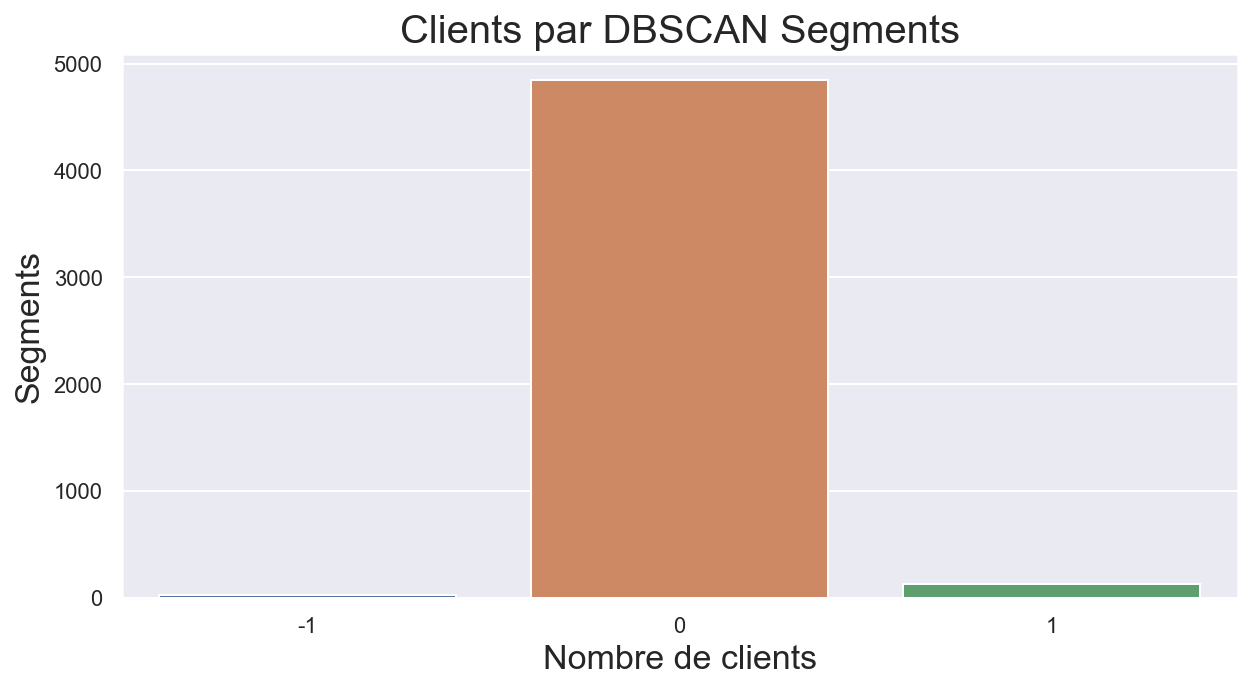

In [68]:
fig=plt.figure(figsize=(10,5))
sns.barplot(x=rfm__['dbsCluster'].value_counts().index,y=rfm__['dbsCluster'].value_counts().values)
plt.title('Clients par DBSCAN Segments',fontsize=20)
plt.xlabel('Nombre de clients',fontsize=17)
plt.ylabel('Segments',fontsize=17)

Text(0.5, 0, 'ID Cluster')

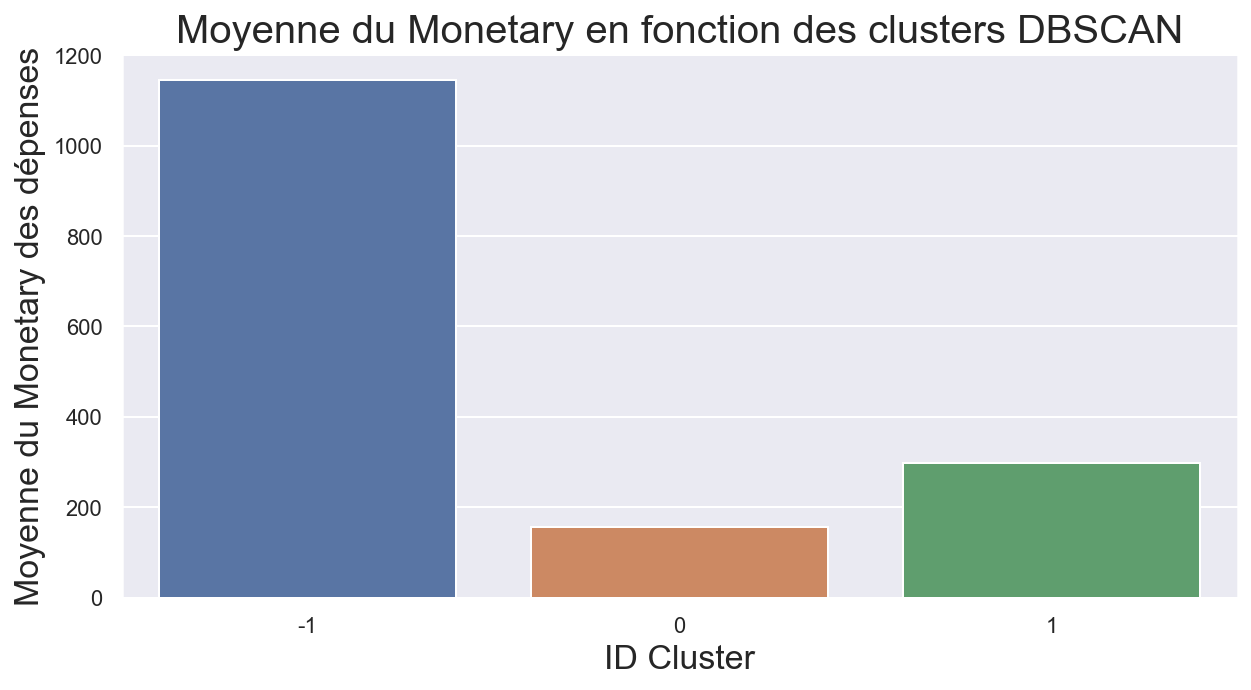

In [69]:
_spendings = rfm__['Monetary'].astype(int).groupby(rfm__['dbsCluster']).mean()
fig=plt.figure(figsize=(10,5))
sns.barplot(x=_spendings.index,y=_spendings.values)
plt.title('Moyenne du Monetary en fonction des clusters DBSCAN',fontsize=20)
plt.ylabel('Moyenne du Monetary des dépenses',fontsize=17)
plt.xlabel('ID Cluster',fontsize=17)

Text(0.5, 0, 'ID Cluster')

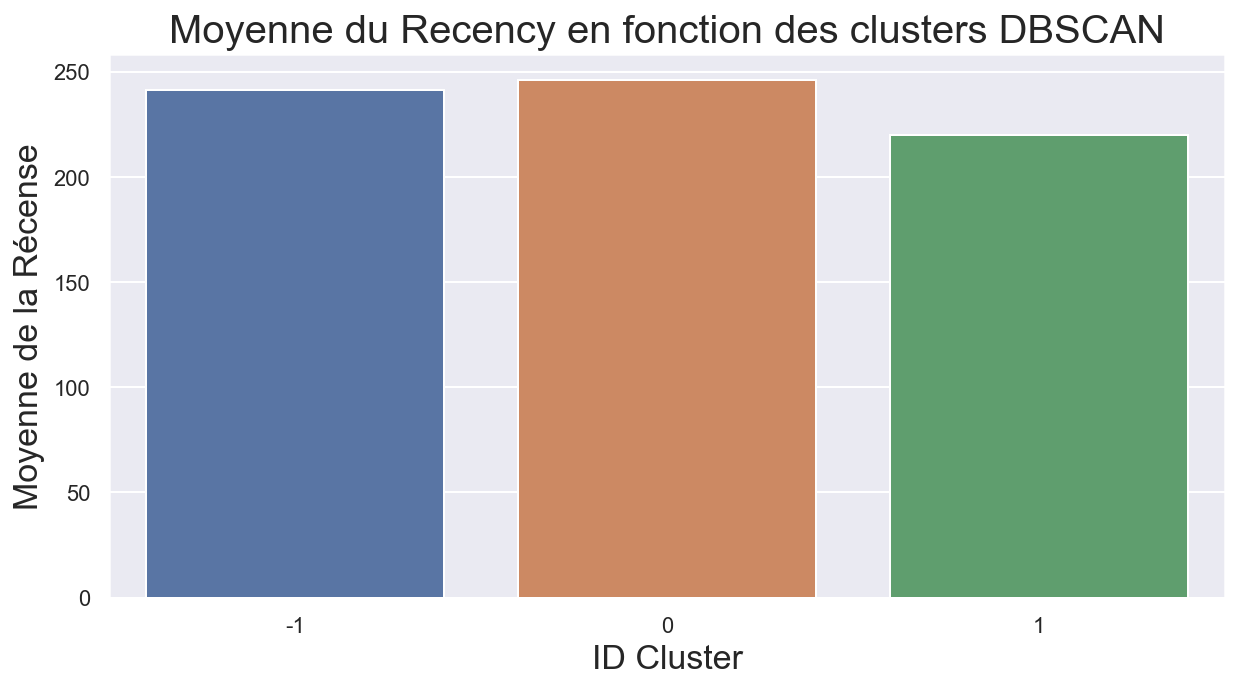

In [70]:
_recence = rfm__['Recency'].astype(int).groupby(rfm__['dbsCluster']).mean()
fig=plt.figure(figsize=(10,5))
sns.barplot(x=_recence.index,y=_recence.values)
plt.title('Moyenne du Recency en fonction des clusters DBSCAN',fontsize=20)
plt.ylabel('Moyenne de la Récense',fontsize=17)
plt.xlabel('ID Cluster',fontsize=17)

Text(0.5, 0, 'ID Cluster')

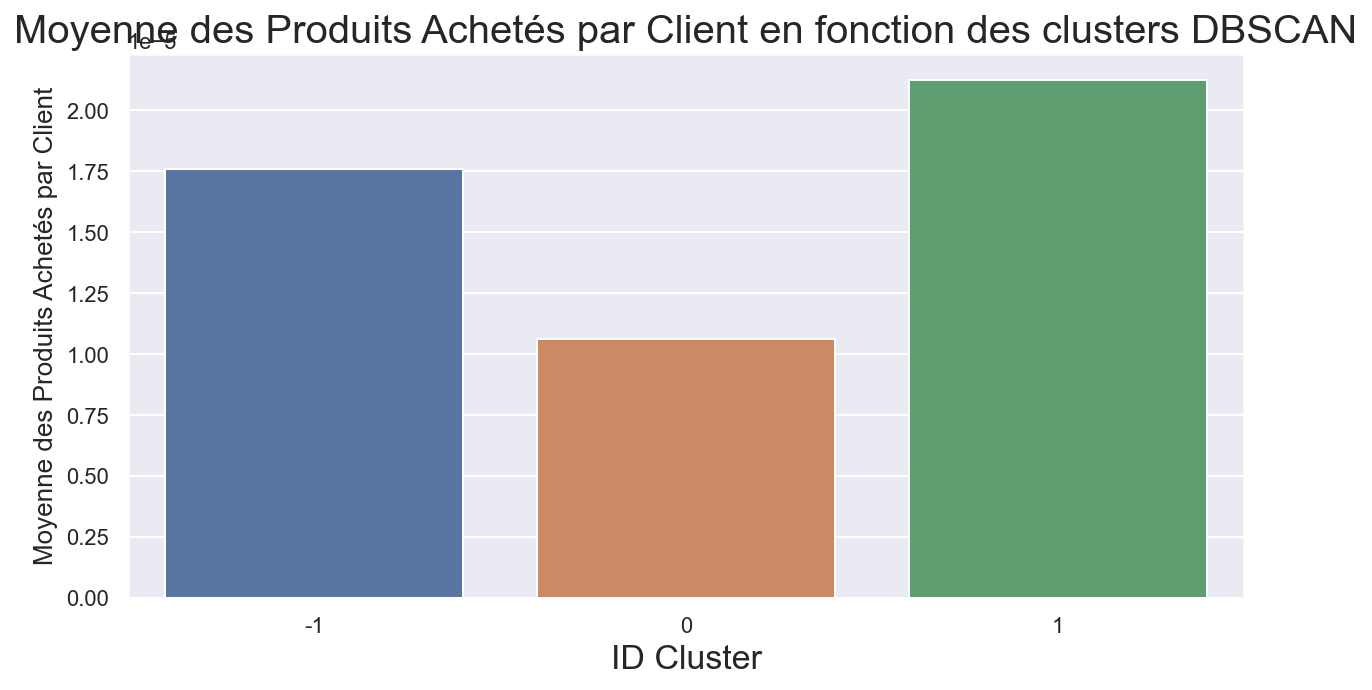

In [71]:
_produits = rfm__['nbr_produits'].groupby(rfm__['dbsCluster']).mean()
fig=plt.figure(figsize=(10,5))
sns.barplot(x=_produits.index, y=_produits.values)
plt.title('Moyenne des Produits Achetés par Client en fonction des clusters DBSCAN',fontsize=20)
plt.ylabel('Moyenne des Produits Achetés par Client',fontsize=13)
plt.xlabel('ID Cluster',fontsize=17)

Text(0.5, 0, 'ID Cluster')

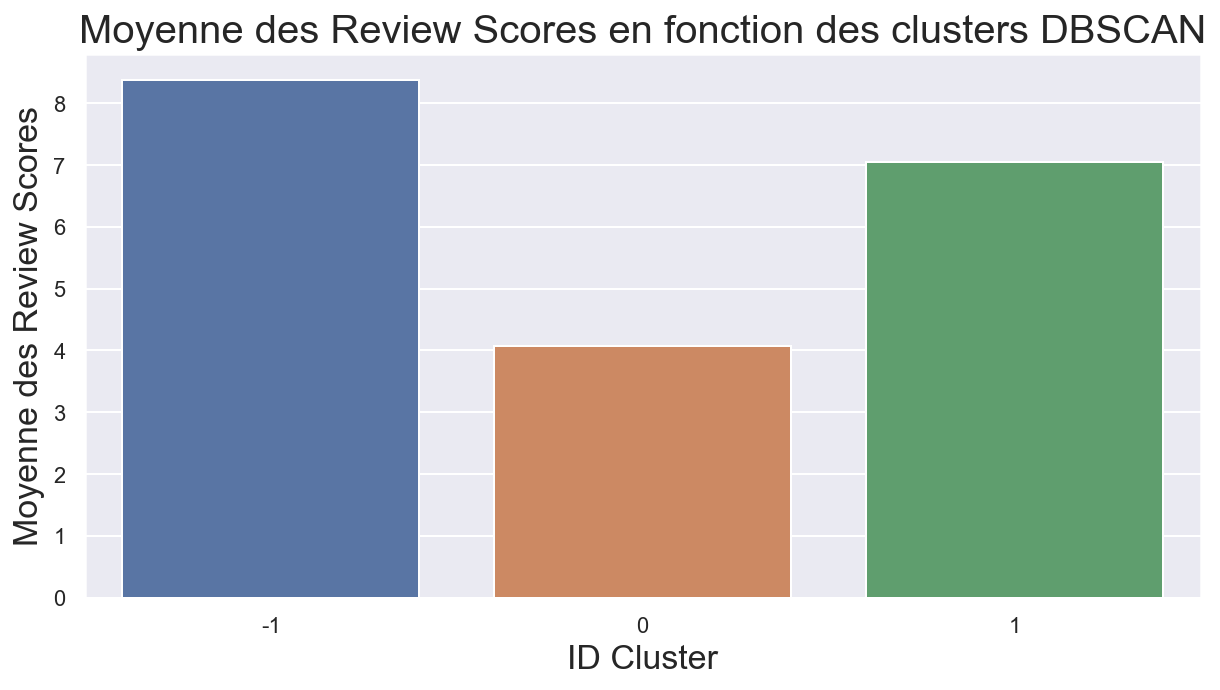

In [72]:
_review = rfm__['review_score'].groupby(rfm__['dbsCluster']).mean()
fig=plt.figure(figsize=(10,5))
sns.barplot(x=_review.index,y=_review.values)
plt.title('Moyenne des Review Scores en fonction des clusters DBSCAN',fontsize=20)
plt.ylabel('Moyenne des Review Scores',fontsize=17)
plt.xlabel('ID Cluster',fontsize=17)

Text(0.5, 0, 'ID Cluster')

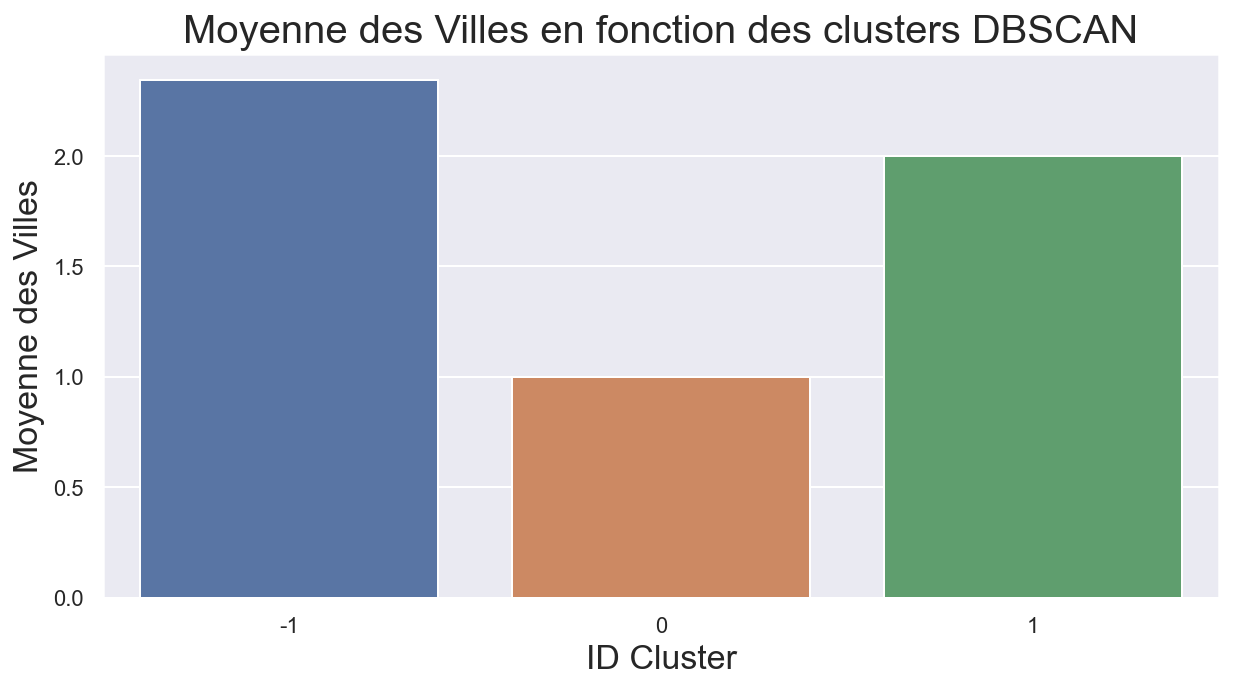

In [73]:
_cities = rfm__['nb_cities'].groupby(rfm__['dbsCluster']).mean()
fig=plt.figure(figsize=(10,5))
sns.barplot(x=_cities.index,y=_cities.values)
plt.title('Moyenne des Villes en fonction des clusters DBSCAN',fontsize=20)
plt.ylabel('Moyenne des Villes',fontsize=17)
plt.xlabel('ID Cluster',fontsize=17)

- Cluster -1: bruit
- Cluster 0 : nouveaux consommateurs.
- Cluster 1 : consommateurs standars

### IV - Segmentation avec Classification ascendante hiérarchique (CAH)

La classification ascendante hiérarchique (CAH) est l'une des appproches de modélisation pour la segmentation dans un modème non supervisé.

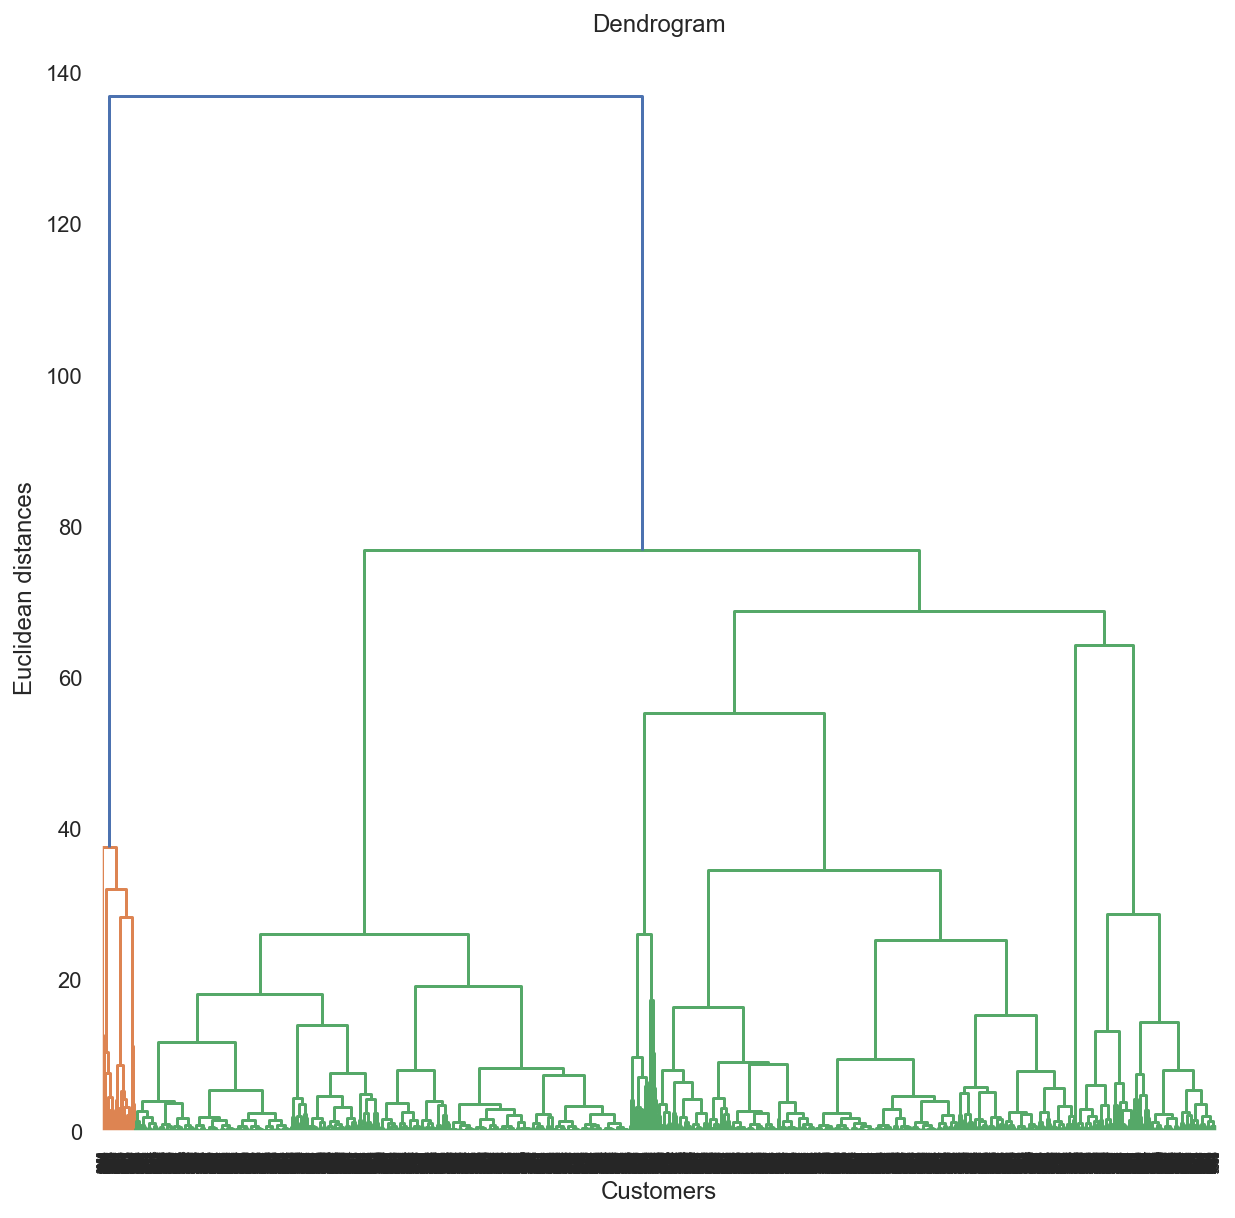

In [74]:
#librairies pour la CAH
from matplotlib import pyplot as plt
#from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

stscaler = StandardScaler().fit(rfm__[['Recency', 'Monetary', 'review_score','nbr_produits','nb_cities']])
X = stscaler.transform(rfm__[['Recency', 'Monetary', 'review_score','nbr_produits','nb_cities']])

plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Avec le choix du seuil à 70 (presque 140/2), le dendrogramme « suggère » un découpage en 3 groupes (ou la distance la plus grande entre les échantillons).

In [75]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)

array([2, 2, 0, ..., 2, 2, 0])

In [76]:
rfm__['cahCluster'] =cluster.labels_

In [77]:
# The silhouette_score gives the average value for all the samples.    # This gives a perspective into the density and separation of the formed
    # clusters
n_clusters=3
cah_silhouette_avg = silhouette_score(X, cluster.labels_, sample_size=5000)
print("For n_clusters =", n_clusters,"\nThe average silhouette_score is :", cah_silhouette_avg)

For n_clusters = 3 
The average silhouette_score is : 0.30964178836000383


Pour ce projet, DBSCAN n'est pas la meilleure méthode pour faire la catégorisation car le phénomène d'écrasement est très important.    

CAH et KMeans donnent de meilleurs résultats. 

CAH suggère directement son choix du nobre de clusters à travers la représentation graphique du "dendrogramme"

A travers la densité, l'épaisseur et la valeurs du coefficient par rapport à la moyenne, l'utilisation de Kmeans facilite la décision de la classificatio par rapport à CAH.

Le coefficient silhouette score avec KMEANS est meilleur que de celui avec CAH.

=> Retenir la méthode KMeans pour le client.

In [78]:
rfm__['cahCluster'].value_counts()

0    2630
2    2221
1     149
Name: cahCluster, dtype: int64

#### - Description actionnable de la segmentation avec CAH

Text(0, 0.5, 'Segments')

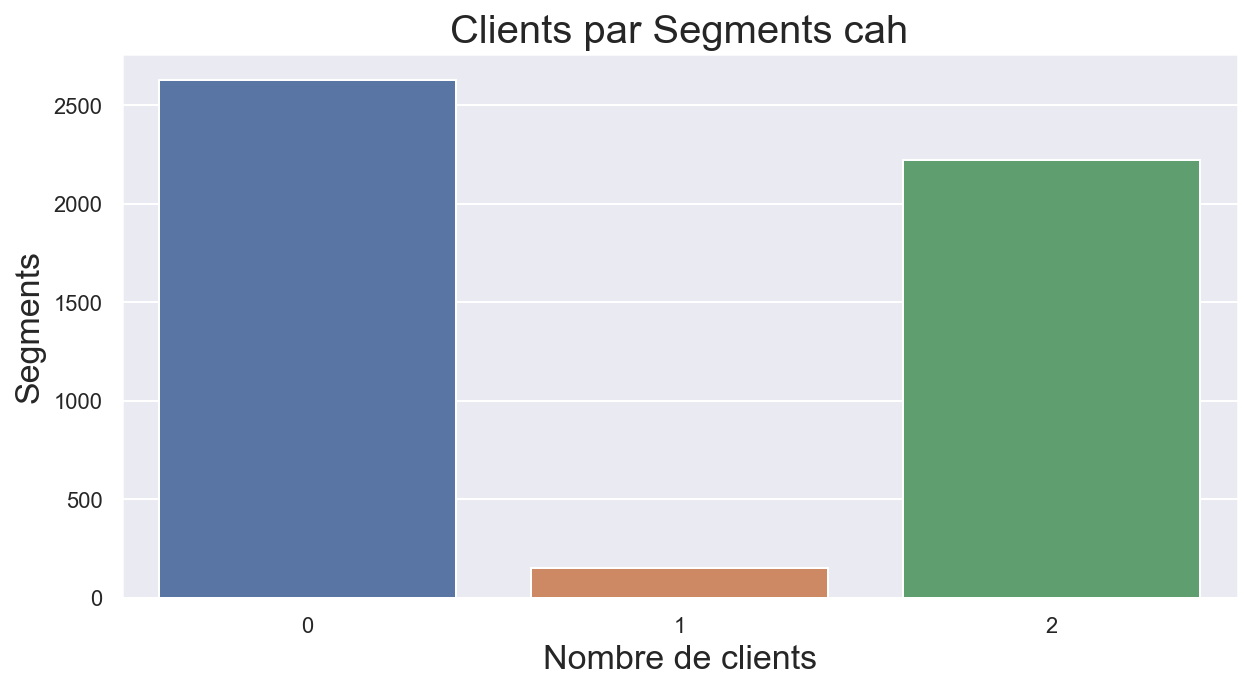

In [79]:
fig=plt.figure(figsize=(10,5))
sns.barplot(x=rfm__['cahCluster'].value_counts().index,y=rfm__['cahCluster'].value_counts().values)
plt.title('Clients par Segments cah',fontsize=20)
plt.xlabel('Nombre de clients',fontsize=17)
plt.ylabel('Segments',fontsize=17)

Text(0.5, 0, 'ID Cluster')

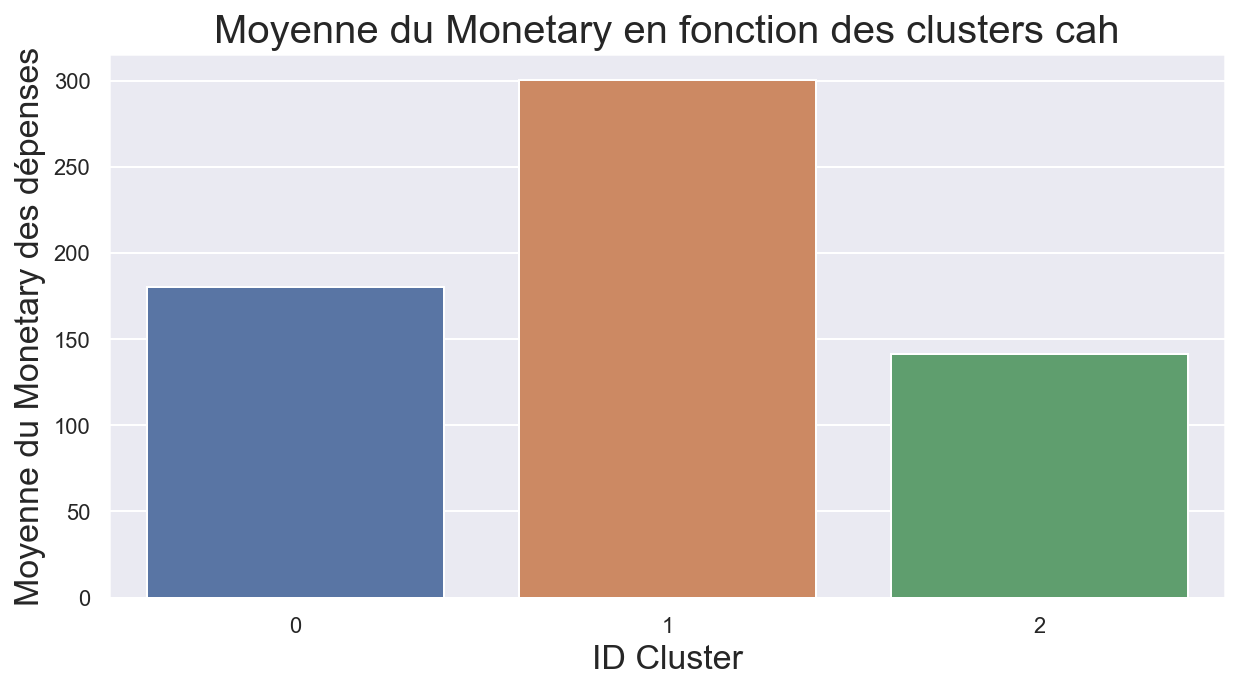

In [80]:
_spendings = rfm__['Monetary'].astype(int).groupby(rfm__['cahCluster']).mean().sort_values(ascending=False)
fig=plt.figure(figsize=(10,5))
sns.barplot(x=_spendings.index,y=_spendings.values)
plt.title('Moyenne du Monetary en fonction des clusters cah',fontsize=20)
plt.ylabel('Moyenne du Monetary des dépenses',fontsize=17)
plt.xlabel('ID Cluster',fontsize=17)

Text(0.5, 0, 'ID Cluster')

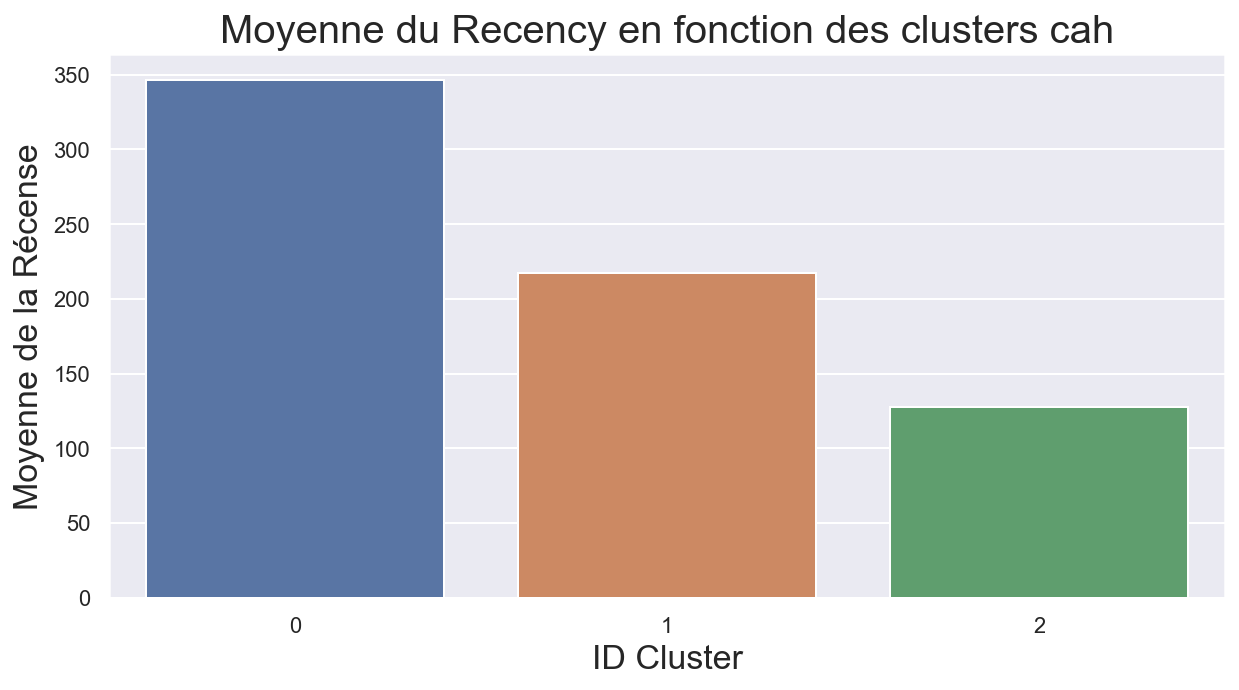

In [81]:
_recence = rfm__['Recency'].astype(int).groupby(rfm__['cahCluster']).mean().sort_values(ascending=False)
fig=plt.figure(figsize=(10,5))
sns.barplot(x=_recence.index,y=_recence.values)
plt.title('Moyenne du Recency en fonction des clusters cah',fontsize=20)
plt.ylabel('Moyenne de la Récense',fontsize=17)
plt.xlabel('ID Cluster',fontsize=17)

Text(0.5, 0, 'ID Cluster')

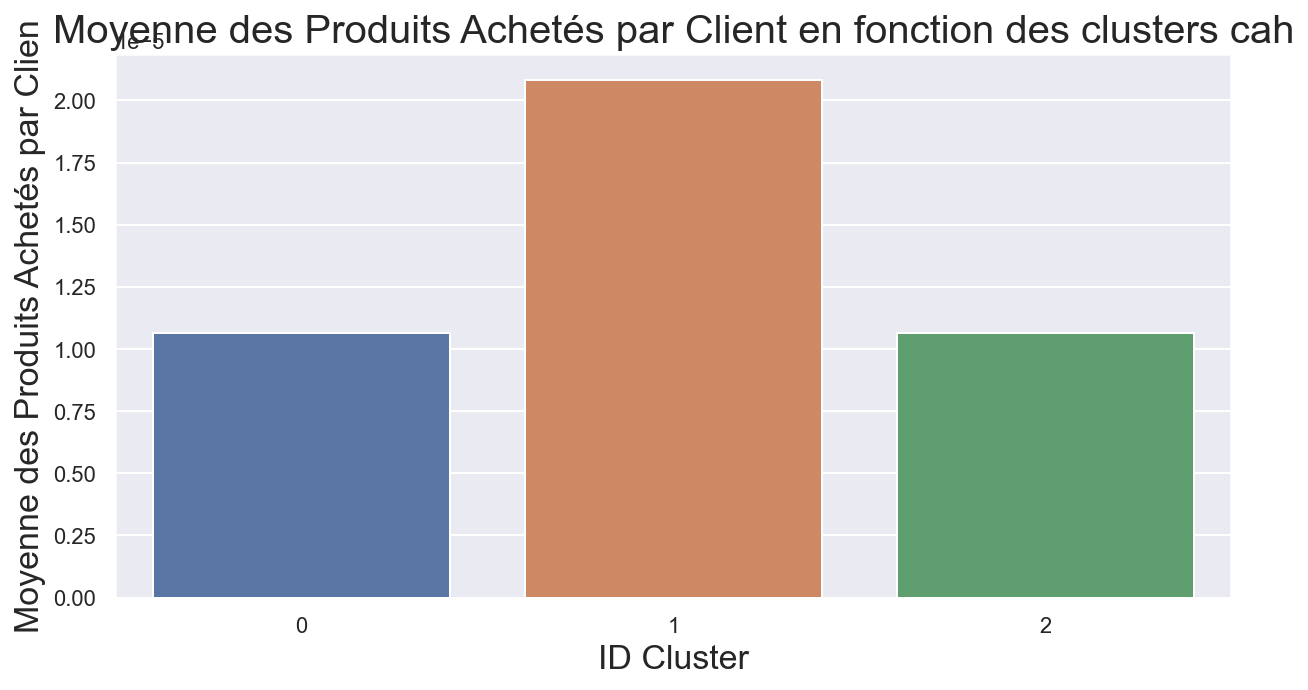

In [82]:
_produits = rfm__['nbr_produits'].groupby(rfm__['cahCluster']).mean()
fig=plt.figure(figsize=(10,5))
sns.barplot(x=_produits.index, y=_produits.values)
plt.title('Moyenne des Produits Achetés par Client en fonction des clusters cah',fontsize=20)
plt.ylabel('Moyenne des Produits Achetés par Clien',fontsize=17)
plt.xlabel('ID Cluster',fontsize=17)

Text(0.5, 0, 'ID Cluster')

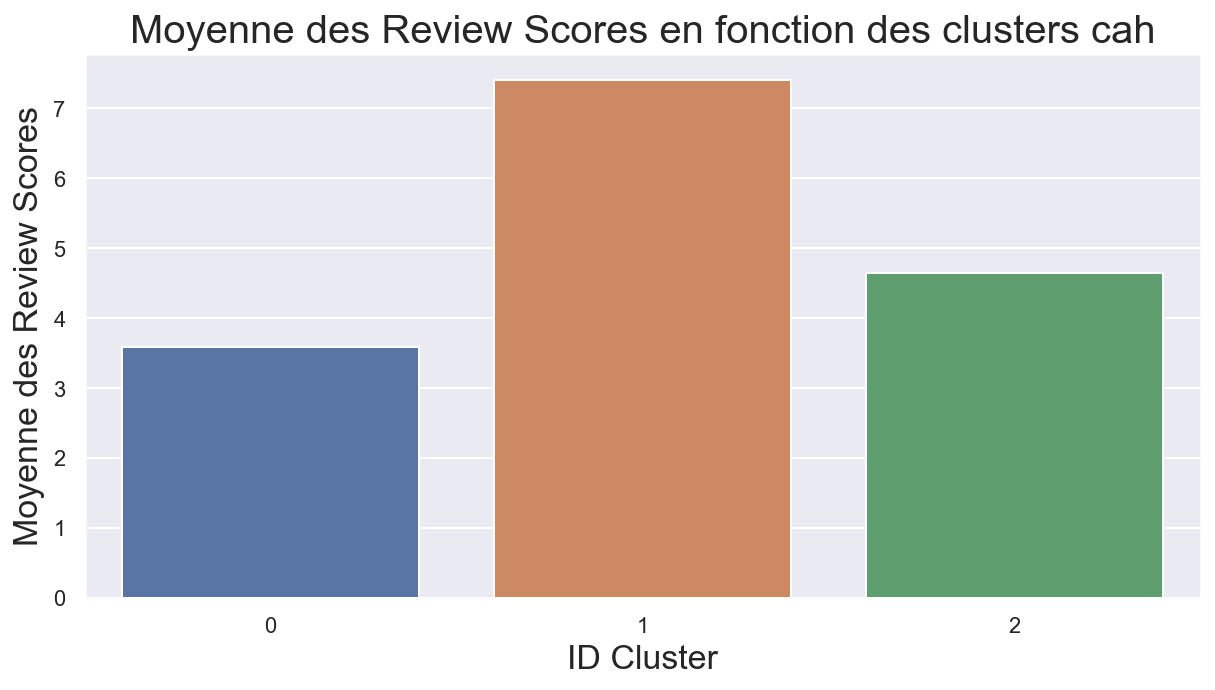

In [83]:
_review = rfm__['review_score'].groupby(rfm__['cahCluster']).mean()
fig=plt.figure(figsize=(10,5))
sns.barplot(x=_review.index,y=_review.values)
plt.title('Moyenne des Review Scores en fonction des clusters cah',fontsize=20)
plt.ylabel('Moyenne des Review Scores',fontsize=17)
plt.xlabel('ID Cluster',fontsize=17)

Text(0.5, 0, 'ID Cluster')

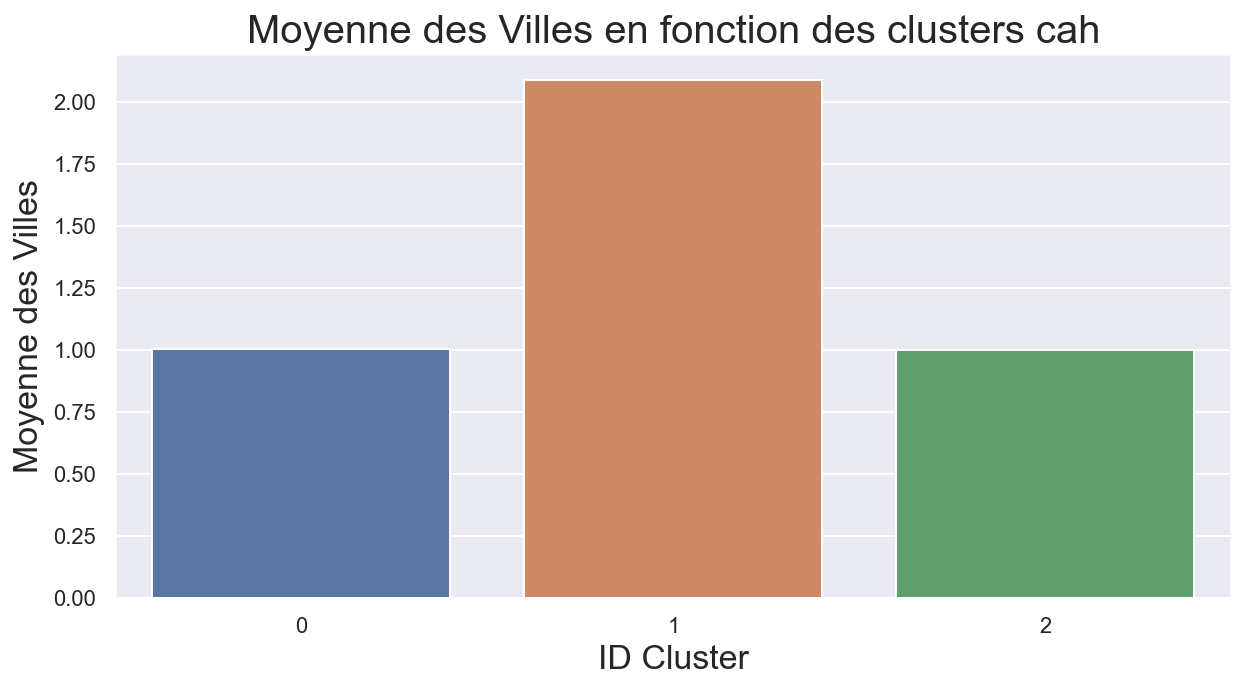

In [84]:
_cities = rfm__['nb_cities'].groupby(rfm__['cahCluster']).mean()
fig=plt.figure(figsize=(10,5))
sns.barplot(x=_cities.index,y=_cities.values)
plt.title('Moyenne des Villes en fonction des clusters cah',fontsize=20)
plt.ylabel('Moyenne des Villes',fontsize=17)
plt.xlabel('ID Cluster',fontsize=17)

 Cluster 0: Consommateurs réguliers 
 
 Cluster 1: Meilleurs consommateurs 
 
 Cluster 2:  Clients à risque (presque perdus)
 

## Analyse de la stabilité

#### - Création des bases

Il s'agit de créer une base de référence d'un an B0 puis les bases futures Bi séparées par un intervalle temporel d'un mois.  
La fonction <I>creationBase</I> permet de récupérer les bases de données où il y a les variables pertinentes du modèle d'apprentissage non supervisé selon les intervalles de temps entrés.

In [85]:
#______________Création des bases (rfm)
def creationBase(base):
    anchorDate =  max(base.order_purchase_timestamp) + datetime.timedelta(days=1)

    # Création table Récence et le montant par ID consommateur.
    rfm = base.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda x: (anchorDate - x.max()).days,
           'payment_value': lambda x: x.sum()})
    rfm.rename(columns = {'order_purchase_timestamp' : 'Recency', 'payment_value' : 'Monetary'}, inplace = True)
    
    # Rajout de nouvelles variables
    x = base[['customer_unique_id', 'review_score']].groupby('customer_unique_id').sum()
    y = base[['customer_unique_id', 'review_score']].groupby('customer_unique_id').nunique()
    rfm['review_score'] = (x/y).astype(int)
    rfm['nbr_produits']=base[['customer_unique_id','product_id']].groupby('customer_unique_id').nunique()/base.customer_unique_id.nunique()
    # Nombre de produit moyen acheté par chaque client
    rfm['nb_cities']=base['customer_city'].groupby(base['customer_unique_id']).count()
    #rfm['nb_cities']=base['customer_city'].groupby(olist['customer_unique_id']).count()
    print("RFM Columns: ", rfm.columns)
    
    stscaler = StandardScaler().fit(rfm)
    X = stscaler.transform(rfm)
    return X

In [86]:
#___________________________Création de la base de référence d'un an (B0)_______________

from dateutil.relativedelta import *

#olist['order_purchase_timestamp'] =pd.to_datetime(olist['order_purchase_timestamp'], unit='D')
#olist['order_purchase_timestamp'] =pd.to_datetime(olist['order_purchase_timestamp'], format='%Y-%m-%d')

olist['order_purchase_timestamp']= pd.to_datetime(olist['order_purchase_timestamp']).dt.date
start_date =  min(olist.order_purchase_timestamp)
end_date = start_date + relativedelta(years=+1)
print("start_date: ",start_date, 'end_date: ', end_date)
mask = (olist.order_purchase_timestamp >= start_date) & (olist.order_purchase_timestamp <= end_date)
B0 = creationBase (olist.loc[mask])

list_bases=[]
list_bases.append(B0)

start_date:  2016-09-04 end_date:  2017-09-04
RFM Columns:  Index(['Recency', 'Monetary', 'review_score', 'nbr_produits', 'nb_cities'], dtype='object')


In [87]:
#__________________________Création des bases d'un mois d'intervalle______________________________________

while end_date < max(olist.order_purchase_timestamp) :
    start_date=end_date + relativedelta(days=+1)
    end_date=start_date + relativedelta(months=+1)
    print("start_date: ",start_date, 'end_date: ', end_date)
    mask = (olist.order_purchase_timestamp >= start_date) & (olist.order_purchase_timestamp <= end_date)
    B = creationBase (olist.loc[mask])
    list_bases.append(B)

start_date:  2017-09-05 end_date:  2017-10-05
RFM Columns:  Index(['Recency', 'Monetary', 'review_score', 'nbr_produits', 'nb_cities'], dtype='object')
start_date:  2017-10-06 end_date:  2017-11-06
RFM Columns:  Index(['Recency', 'Monetary', 'review_score', 'nbr_produits', 'nb_cities'], dtype='object')
start_date:  2017-11-07 end_date:  2017-12-07
RFM Columns:  Index(['Recency', 'Monetary', 'review_score', 'nbr_produits', 'nb_cities'], dtype='object')
start_date:  2017-12-08 end_date:  2018-01-08
RFM Columns:  Index(['Recency', 'Monetary', 'review_score', 'nbr_produits', 'nb_cities'], dtype='object')
start_date:  2018-01-09 end_date:  2018-02-09
RFM Columns:  Index(['Recency', 'Monetary', 'review_score', 'nbr_produits', 'nb_cities'], dtype='object')
start_date:  2018-02-10 end_date:  2018-03-10
RFM Columns:  Index(['Recency', 'Monetary', 'review_score', 'nbr_produits', 'nb_cities'], dtype='object')
start_date:  2018-03-11 end_date:  2018-04-11
RFM Columns:  Index(['Recency', 'Monetary'

In [88]:
#___________________________Affichage de la date correspondant au dernier ordre d'achat____________________
max(olist.order_purchase_timestamp)

datetime.date(2018, 9, 3)

In [89]:
len(list_bases)

13

In [93]:
c_clusters=[]
b_by_c0=[]
b_by_c=[]

#      entrainer C0 sur B0, C1 sur B1, C2 sur B2, etc
# --------------------2---------------
#      On part d'une base de référence d'un an B0, on apprend dessus
#            un clustering C0 (livré au client) -> c0_cluster.fit(b0_data)


#--------------------5---------------

#_________Création des classificateurs___________
for i in range (len(list_bases)):
    c_clusters.append(KMeans(n_clusters=6, random_state=10))   

#_________Apprentissage des classificateurs___________
#______Apprendre tous les clustering sur les bases artificielles B1, B2, etc -> 
#C1 C2 C3 (les clustering futures) -> c1_cluster.fit(b1_data), etc pour tous les B de 1 à N
for c_cluster, B in zip(c_clusters, list_bases):
    c_cluster.fit(B)


#----------------------------6 segmenter avec (C0)-----------------------------
#--------------Segmenter B1 B2 B3 avec C0 -> b1_by_c0 = c0_cluster.predict(b1_data), etc

for B in list_bases:
    b_by_c0.append( c_clusters[0].predict(B) )

    

#------------------------------7 Segmenter (C Respectifs)-------------
for c_cluster, B in zip(c_clusters, list_bases):
    b_by_c.append( c_cluster.predict(B) )


### - Etude de stabilité:  
Selon la courbe "Indice de rand en fonction des bases", l'indice de rand décroit dès le 2ième mois à 0.42.  
Nous évaluons ainsi à 2 mois la fréquence à laquelle la segmentation doit être mise à jours afin de pouvoir effectuer un devis de contrat de maintenance.



In [94]:

#----------------------8- Comparer la segmentation de B1 B2 B3 entre C0 (livré au client) et les autres (C1 etc)
# avec l'indice de rand -> rand(b1_by_c0, b1_by_c1), rand(b2_by_c0, b2_by_c2), etc pour tous les B de 1 à N

#  Comparer la segmentation de B1 B2 B3 entre C0 (livré au client) et les autres (C1 etc) avec l'indice de rand 


rand=[]
from sklearn.metrics.cluster import adjusted_rand_score
#from sklearn.metrics.cluster import rand


for x, y in zip(b_by_c0, b_by_c):
    rand.append( adjusted_rand_score(x, y) )


Text(0.5, 1.0, 'Indice de rand en fonction des bases')

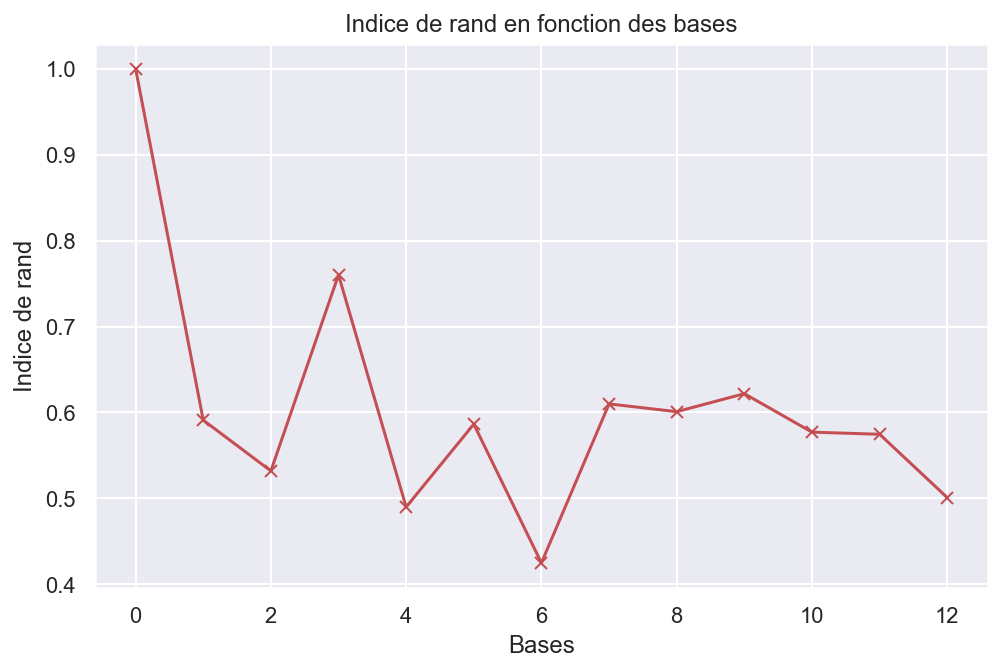

In [95]:
plt.plot(rand , '-rx')
plt.xlabel("Bases")
plt.ylabel("Indice de rand")
plt.title('Indice de rand en fonction des bases')

### Conclusion  
Le projet "segmentation des clients d’un site e-commerce" a permit de relever les défis de la classification non supervisée des clients à tarvers :   

- La transformation des variables pertinentes d'un modèle d'apprentissage non supervisé

- L’adaptation des hyperparamètres d'un algorithme non supervisé afin de l'améliorer

- L’évaluation des performances d’un modèle d'apprentissage non supervisé

- L’étude de la stabilité